<a href="https://colab.research.google.com/github/Poojarahangdale22/Python-Data-analysis/blob/main/Hotel_Booking_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2017          September   
1  Resort Hotel            0        737               2017          September   
2  Resort Hotel            0          7               2017          September   
3  Resort Hotel            0         13               2017          September   
4  Resort Hotel            0         14               2017          September   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_weekdays_nights  adults  children  \
0                        0                         0       2       0.0   
1                        0                         0       2       0.0   
2                        0                         1       1       0.0   
3                        0                         1       1       0.0   
4                        0                         2       2       0.0   

   babies       meal              city market_segment distribution_channel  \
0       0  Breakfast     Kota Denpasar         Direct               Direct   
1       0  Breakfast     Kota Denpasar         Direct               Direct   
2       0  Breakfast  Kabupaten Bangka         Direct               Direct   
3       0  Breakfast  Kabupaten Bangka      Corporate            Corporate   
4       0  Breakfast  Kabupaten Bangka      Online TA                TA/TO   

   is_repeated_guest  previous_cancellations  previous_bookings_not_canceled  \
0                  0                       0                               0   
1                  0                       0                               0   
2                  0                       0                               0   
3                  0                       0                               0   
4                  0                       0                               0   

   booking_changes deposit_type  agent  company  days_in_waiting_list  \
0                3   No Deposit    NaN      NaN                     0   
1                4   No Deposit    NaN      NaN                     0   
2                0   No Deposit    NaN      NaN                     0   
3                0   No Deposit  304.0      NaN                     0   
4                0   No Deposit  240.0      NaN                     0   

  customer_type   adr  required_car_parking_spaces  total_of_special_requests  \
0      Personal   0.0                            0                          0   
1      Personal   0.0                            0                          0   
2      Personal  75.0                            0                          0   
3      Personal  75.0                            0                          0   
4      Personal  98.0                            0                          1   

  reservation_status  
0          Check-Out  
1          Check-Out  
2          Check-Out  
3          Check-Out  
4          Check-Out

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

# Data Preprocessing Part 1

In [ ]:
df.select_dtypes(include='object').nunique()

hotel                     2
arrival_date_month       12
meal                      5
city                    177
market_segment            8
distribution_channel      5
deposit_type              3
customer_type             4
reservation_status        3
dtype: int64

In [ ]:
# Drop 'city' column because the number of unique value is alot
df.drop(columns='city', inplace=True)
df.shape

(119390, 28)

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_weekdays_nights            35
adults                              14
children                             5
babies                               5
meal                                 5
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list               128
customer_type                        4
adr                               8879
required_car_parking_spac

# Exploratory Data Analysis

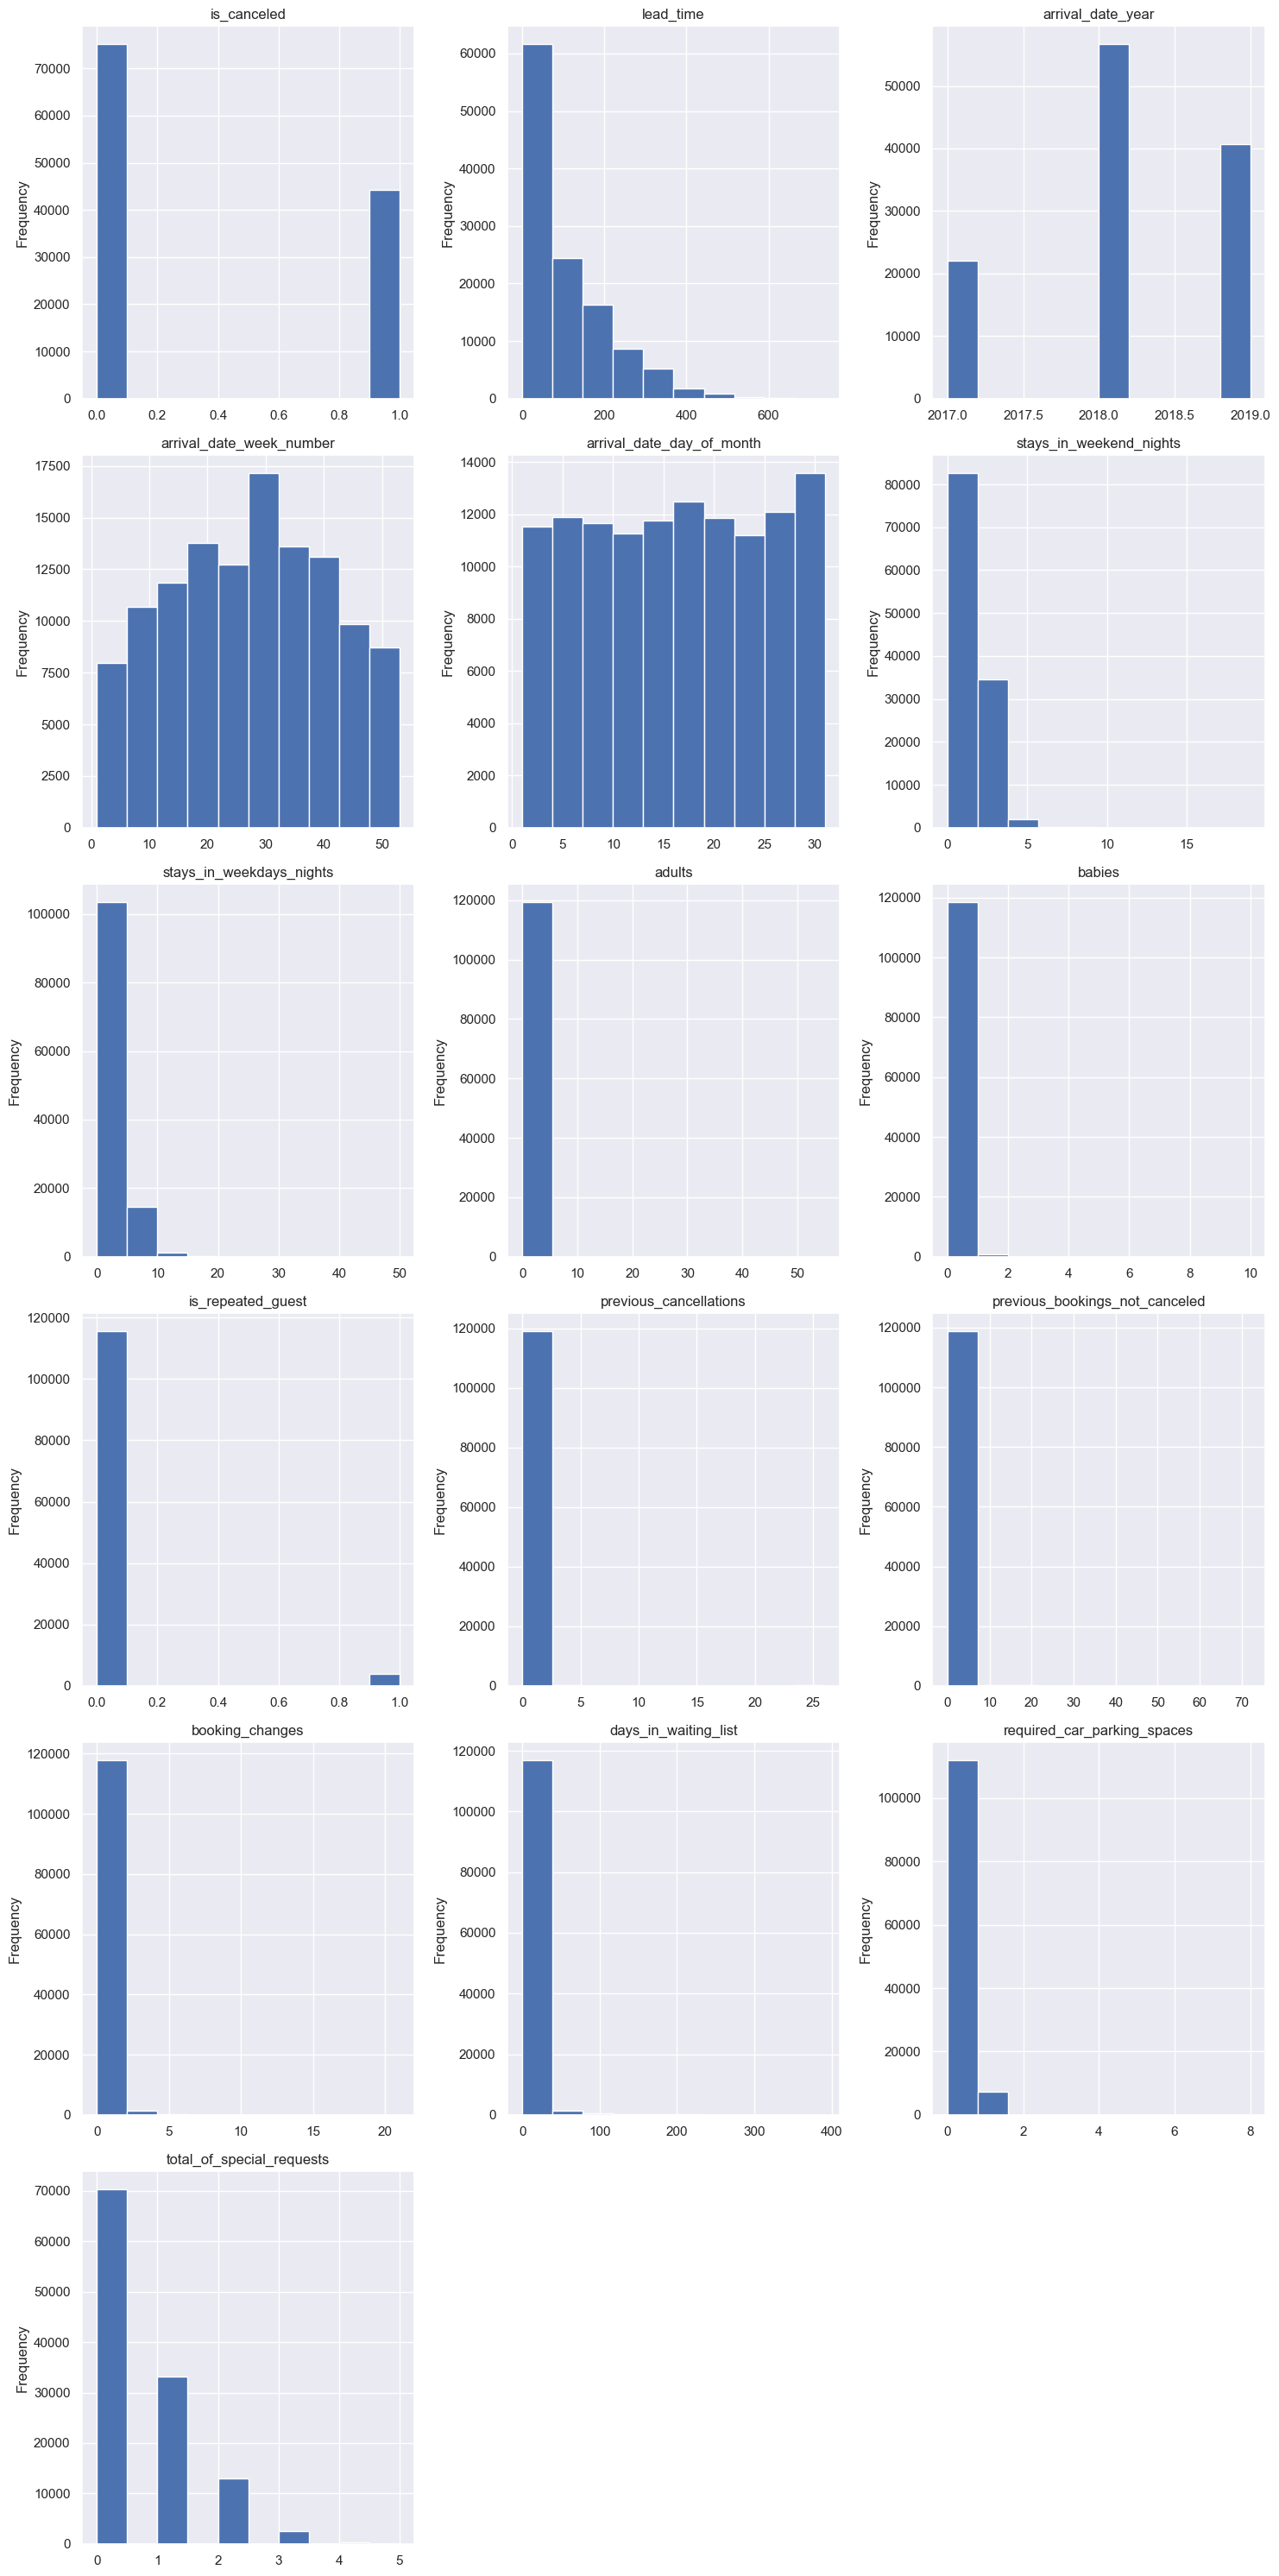

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

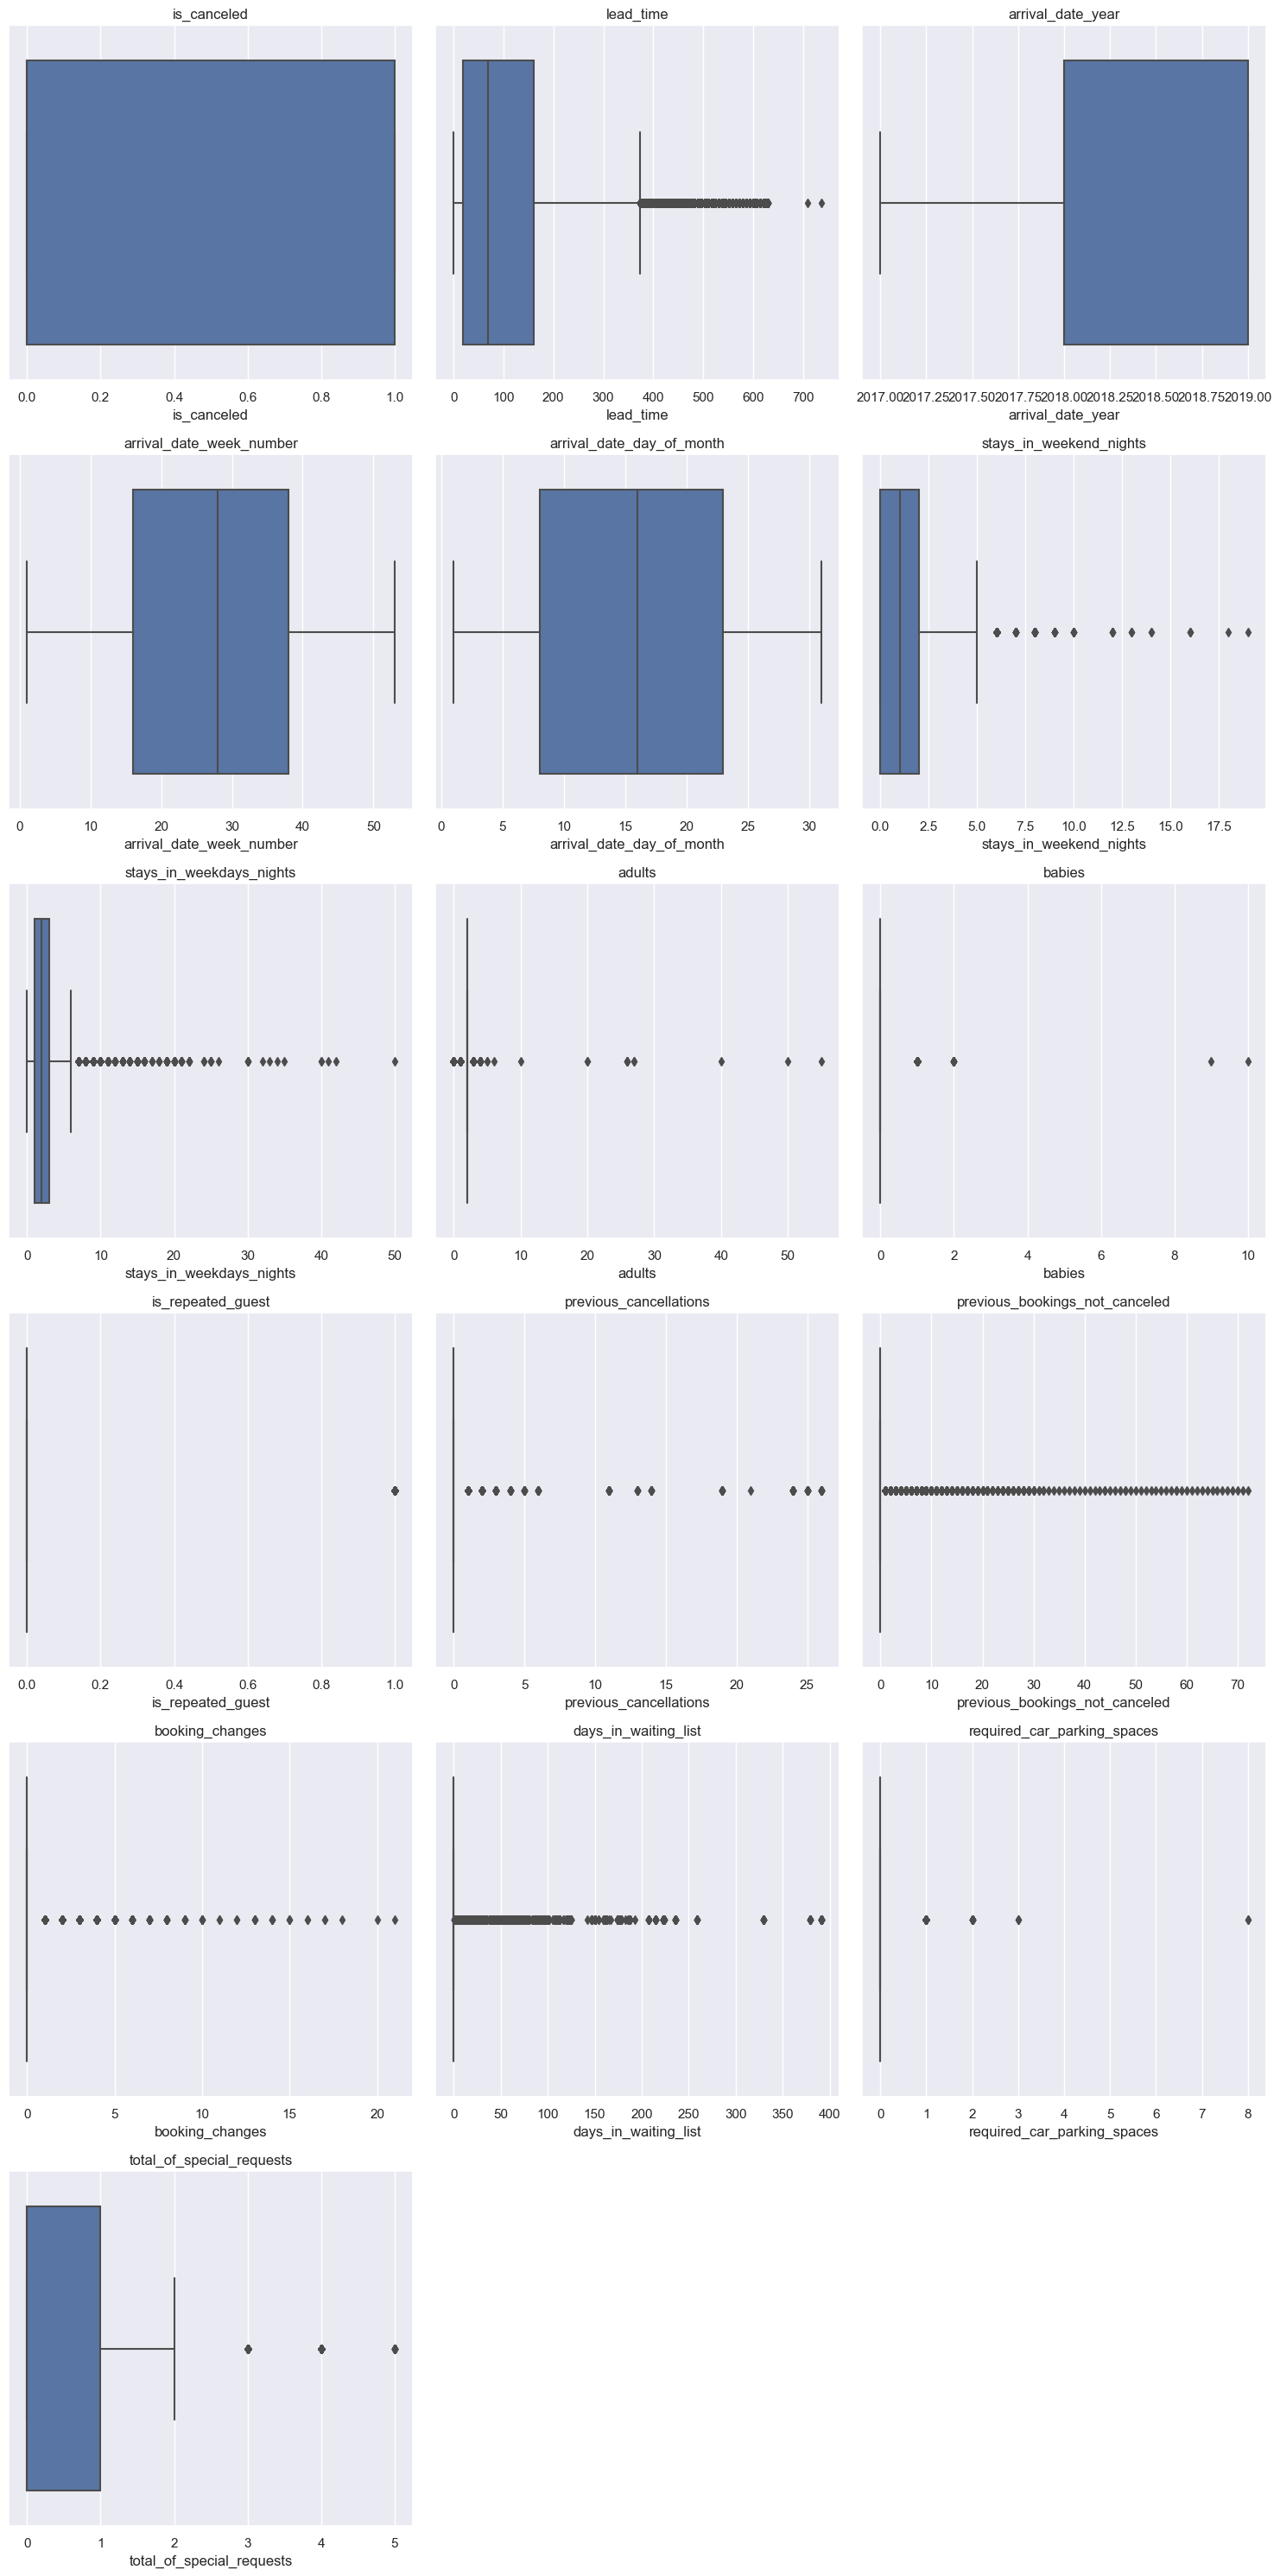

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(int_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

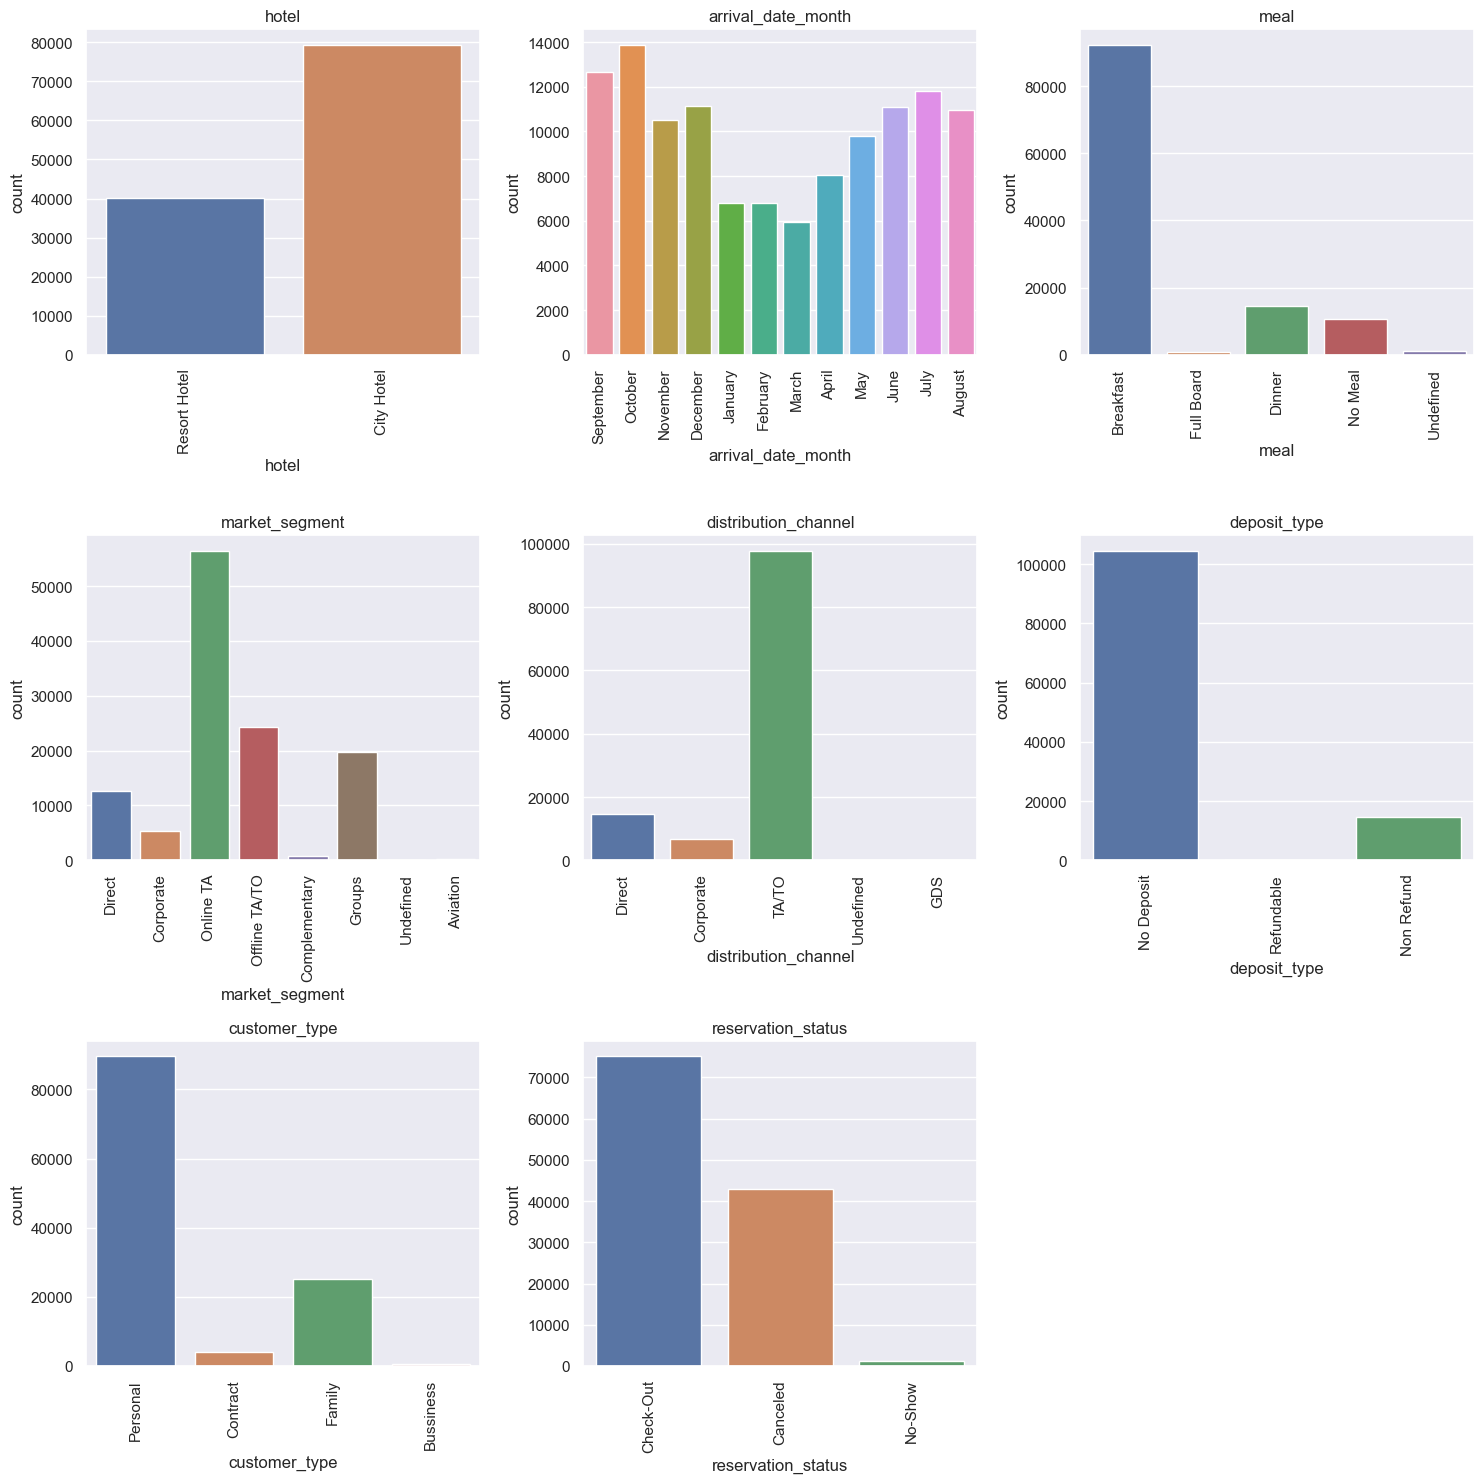

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

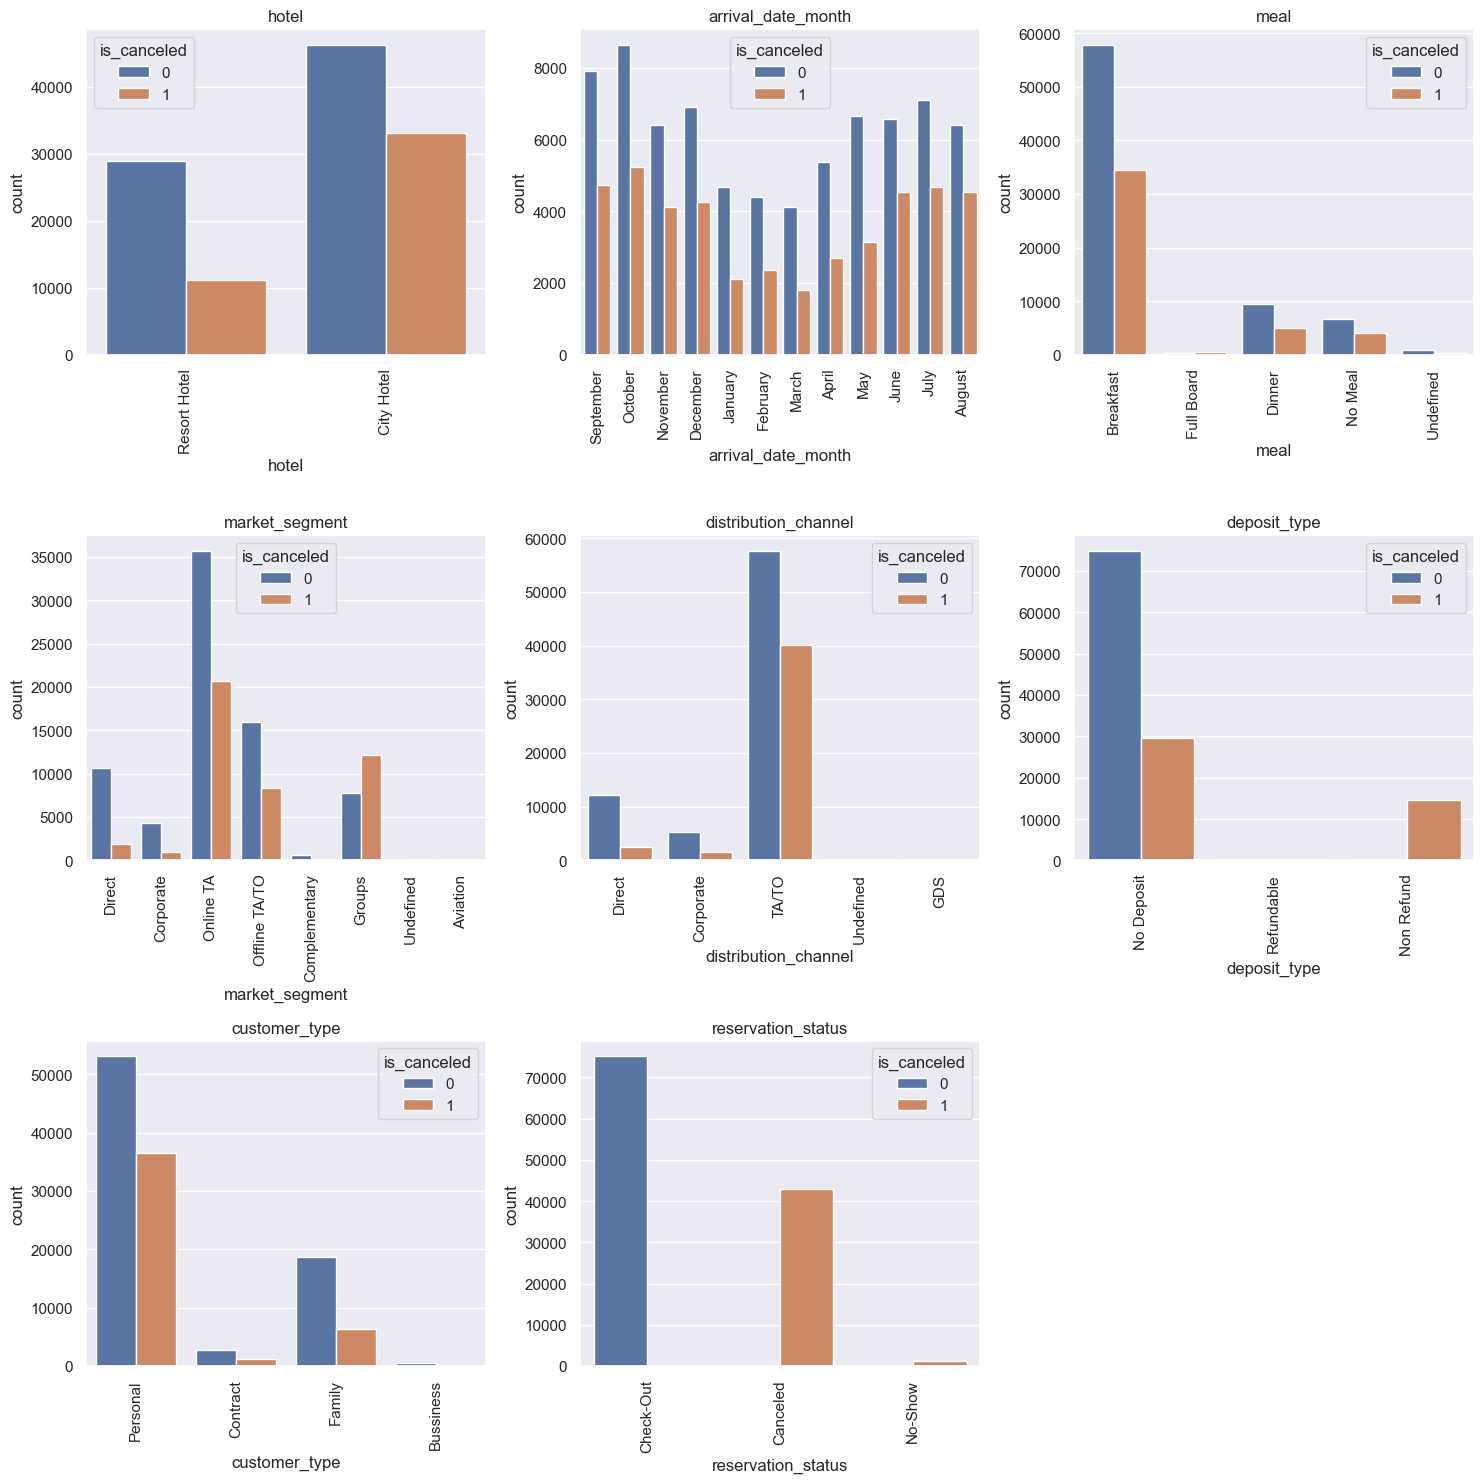

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn with 'Attrition' as hue
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='is_canceled', data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

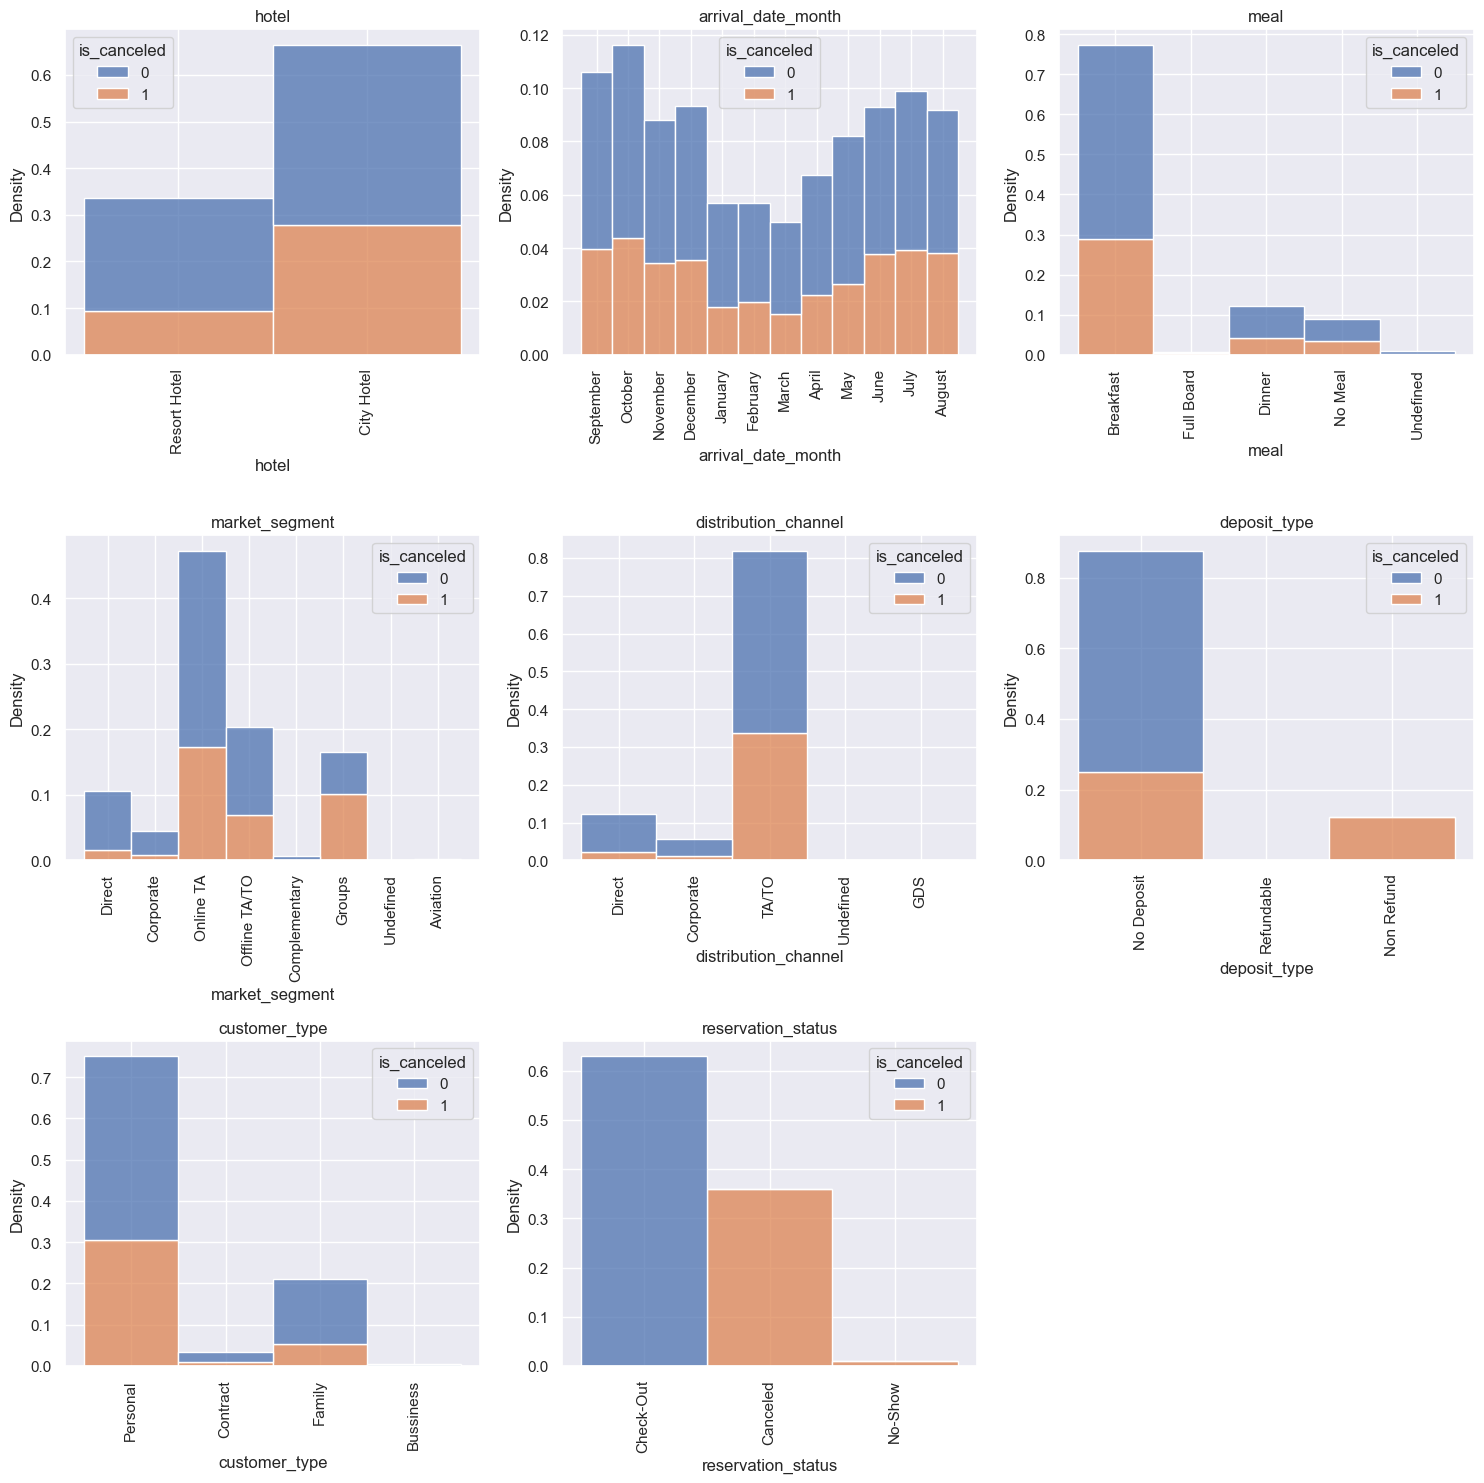

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create the stacked density plot
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(data=df, x=var, hue='is_canceled', stat='density', multiple='stack', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_ylabel('Density')
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

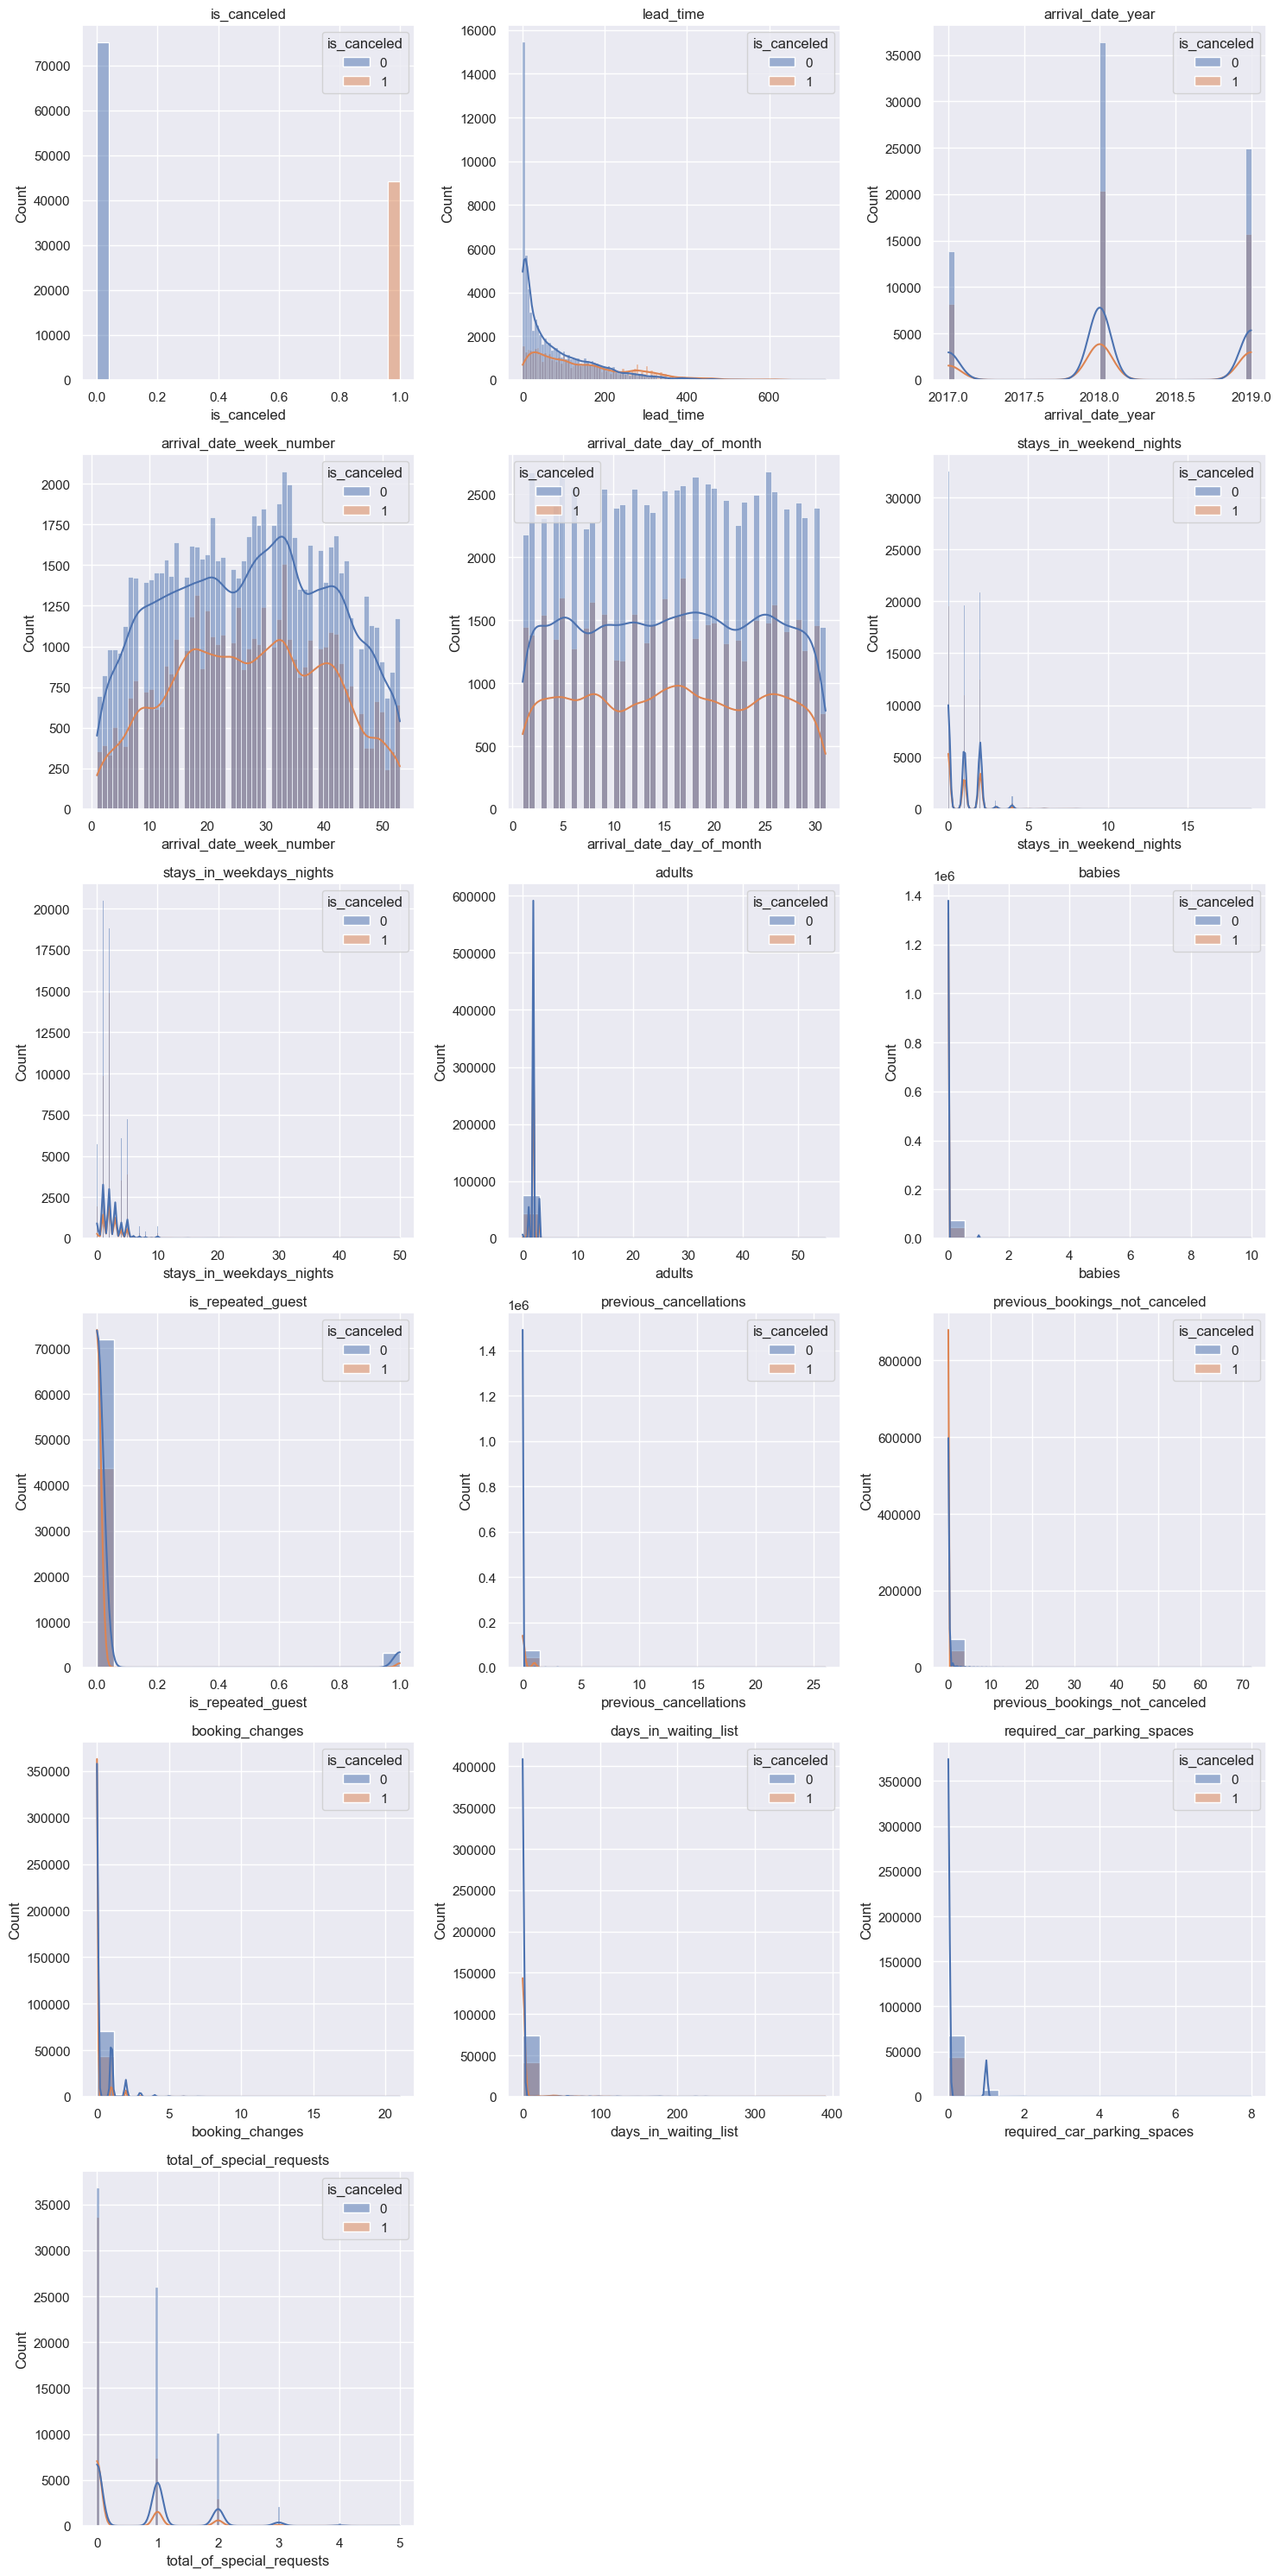

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='is_canceled', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

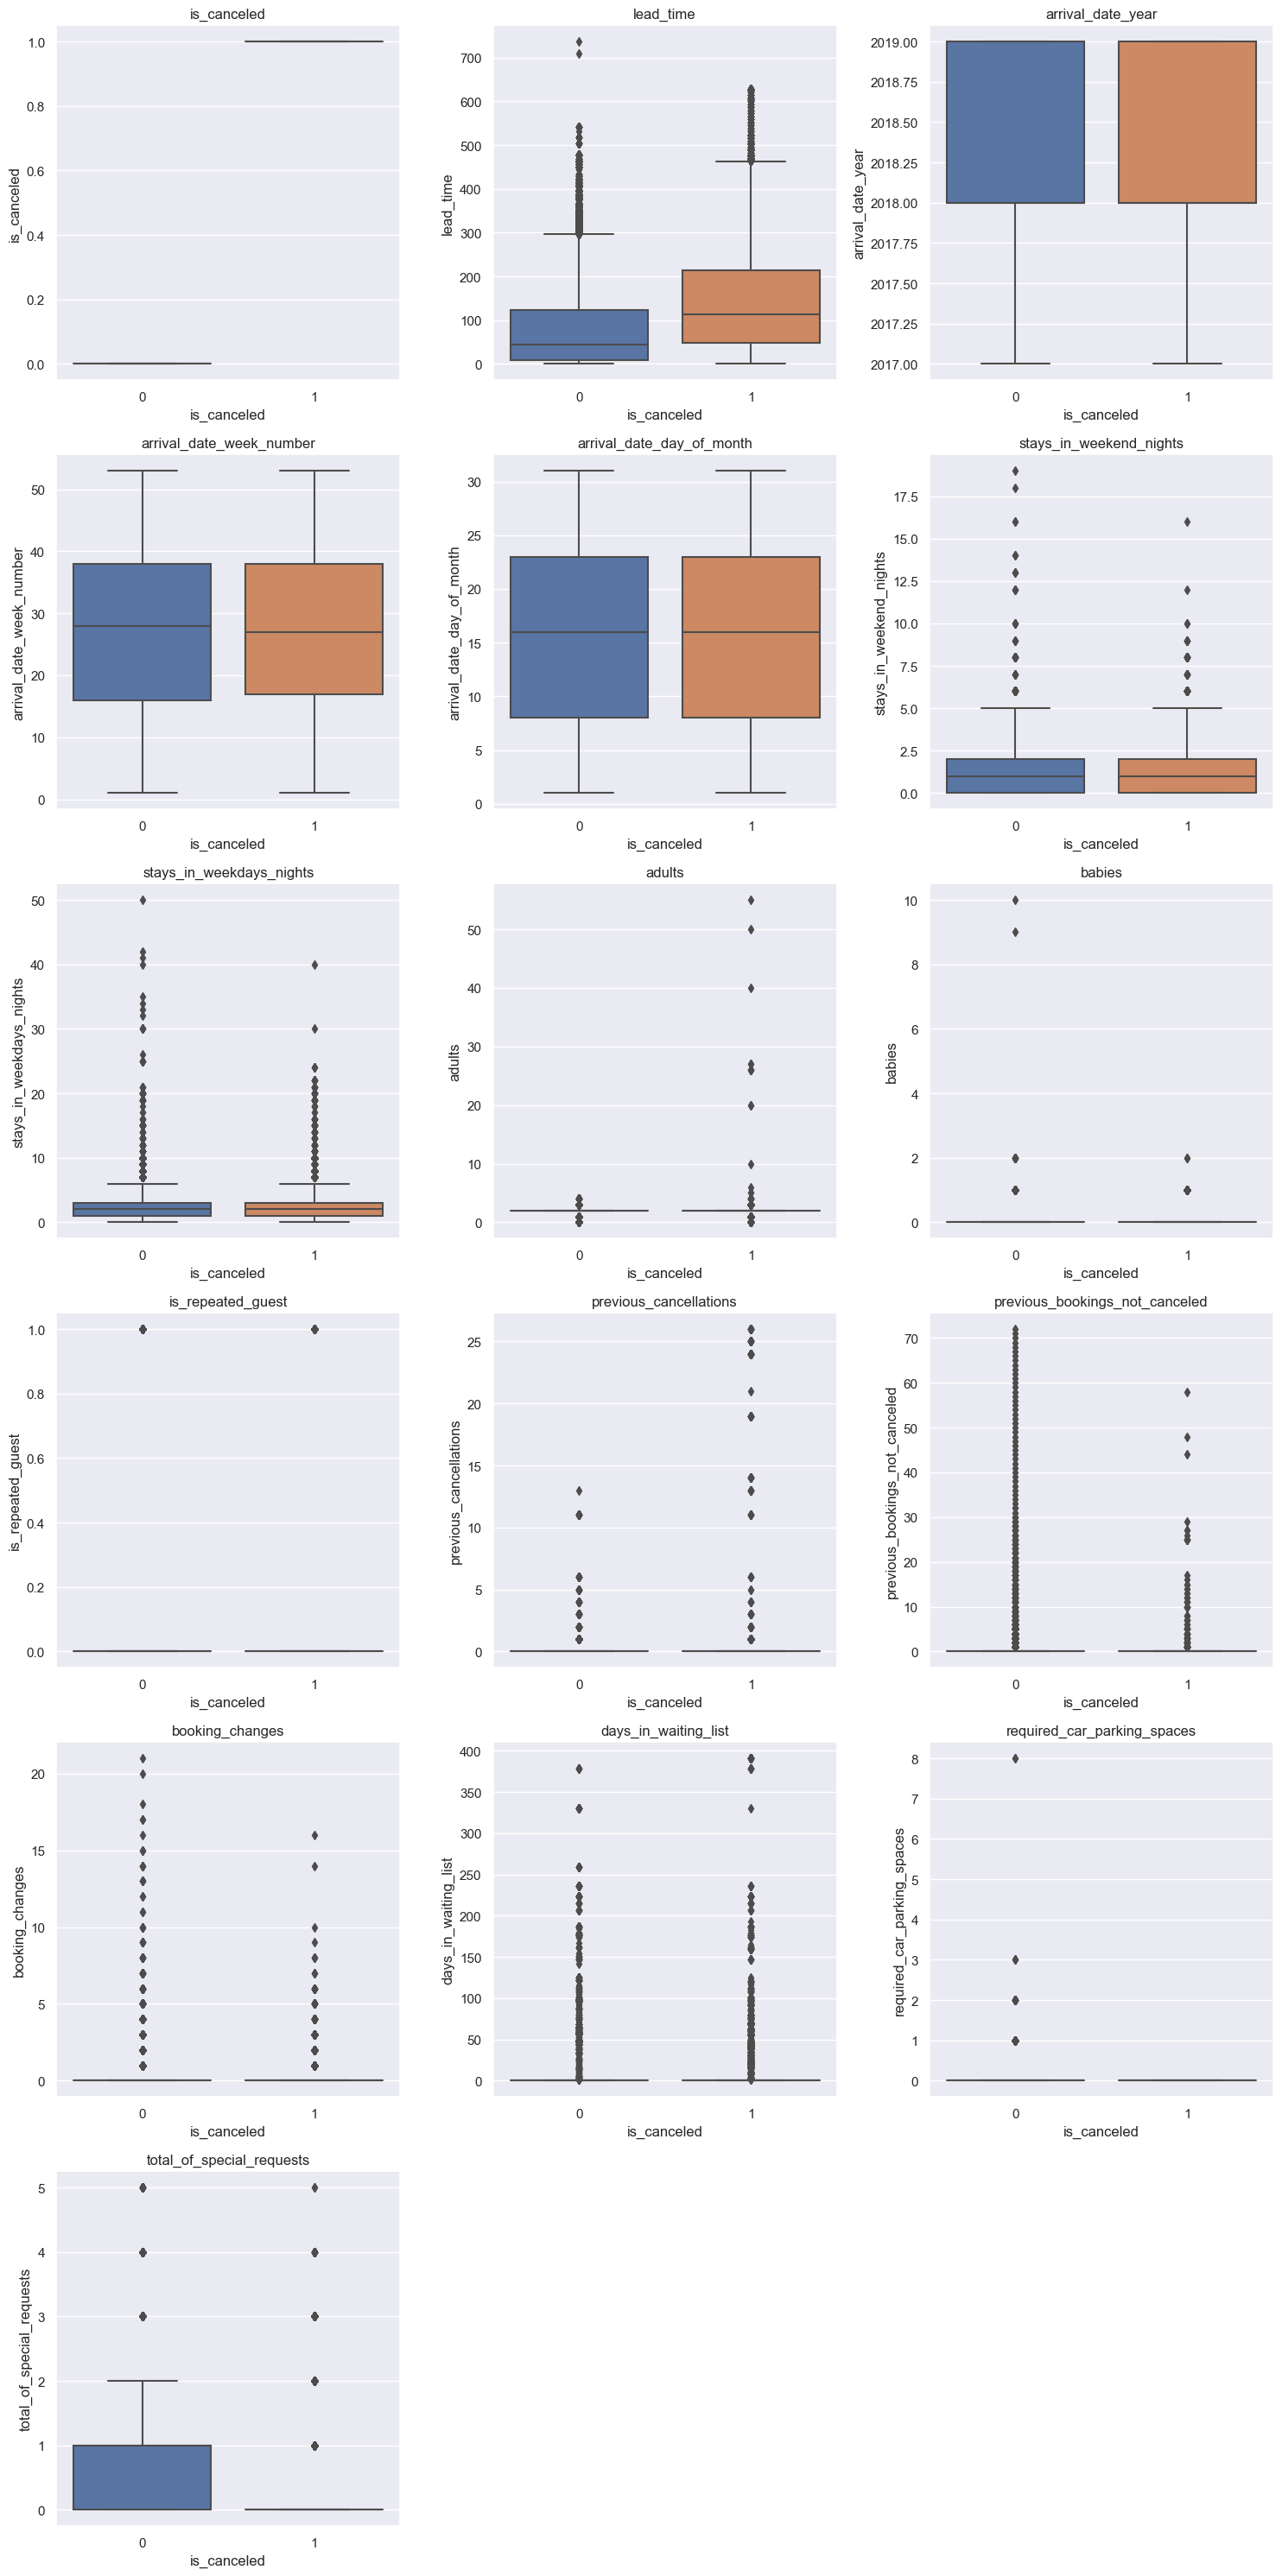

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='is_canceled', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

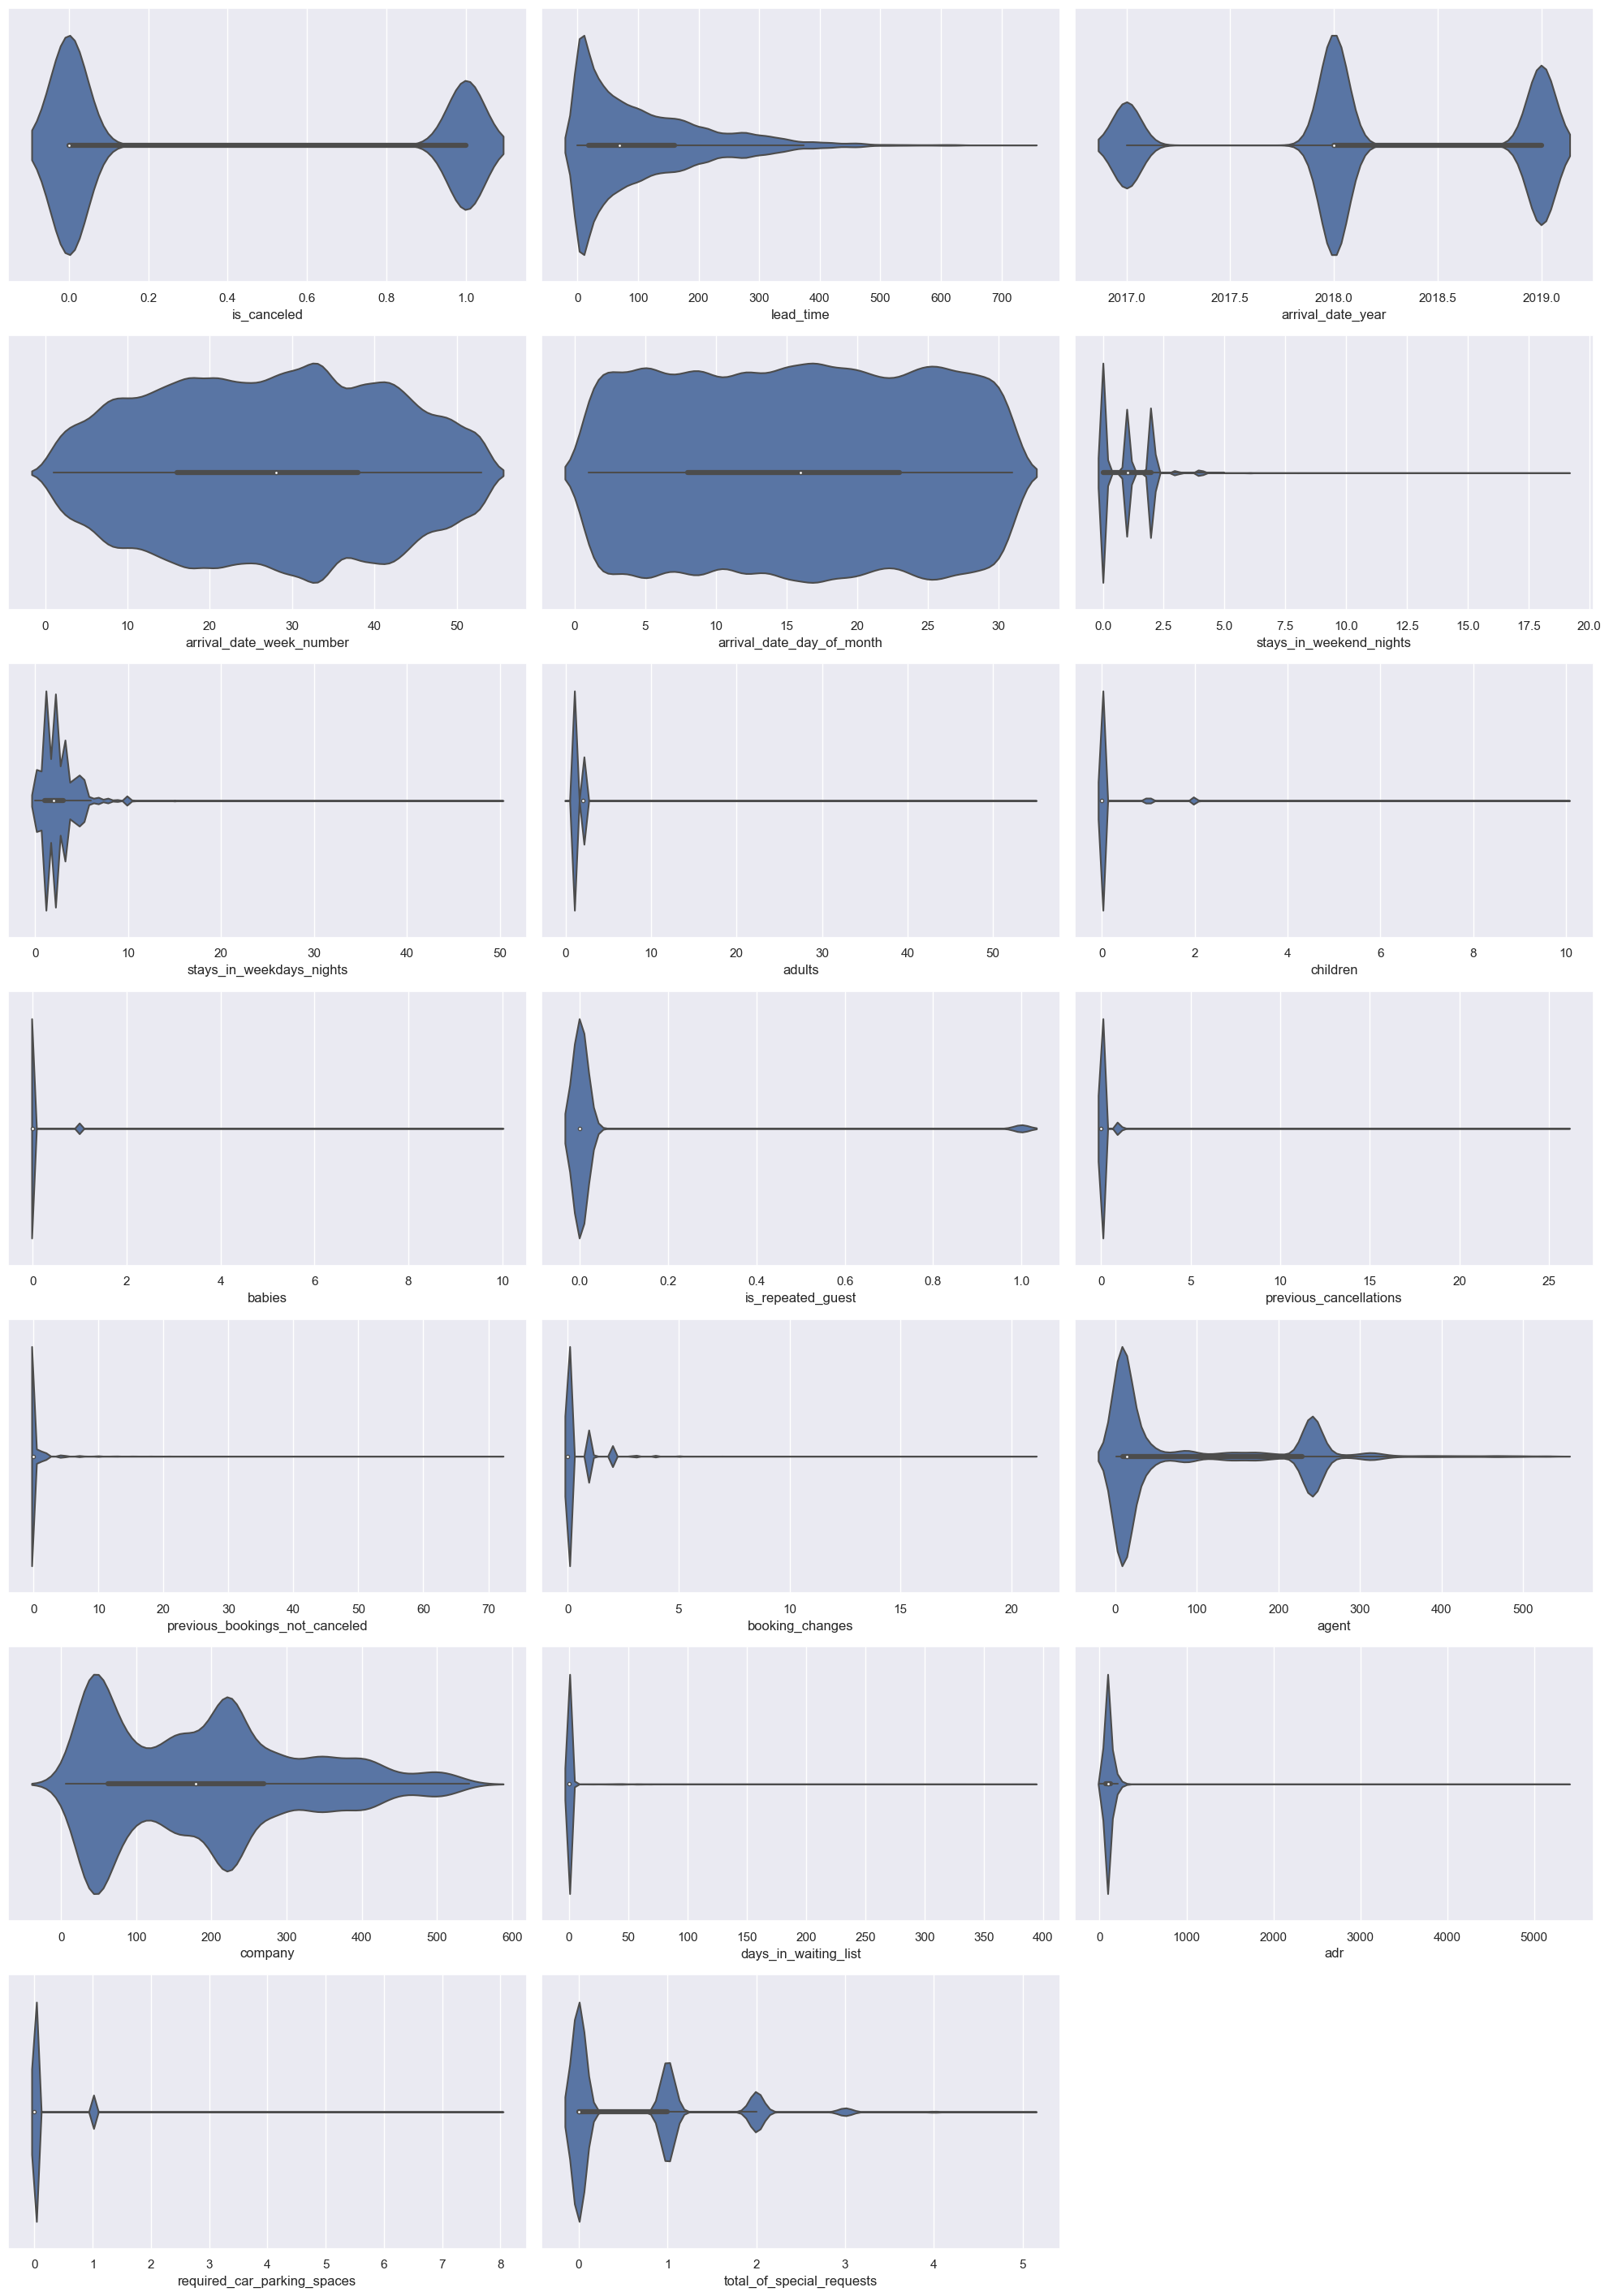

In [ ]:
# Select columns with int or float data types
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create subplots
num_rows = (len(num_vars) + 4) // 3  # Adjust the number of rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 4*num_rows))
axs = axs.flatten()

# Create violin plots for numeric columns
for i, var in enumerate(num_vars):
    sns.violinplot(x=var, data=df, ax=axs[i])

# Remove any extra empty subplots if needed
if len(num_vars) < len(axs):
    for i in range(len(num_vars), len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

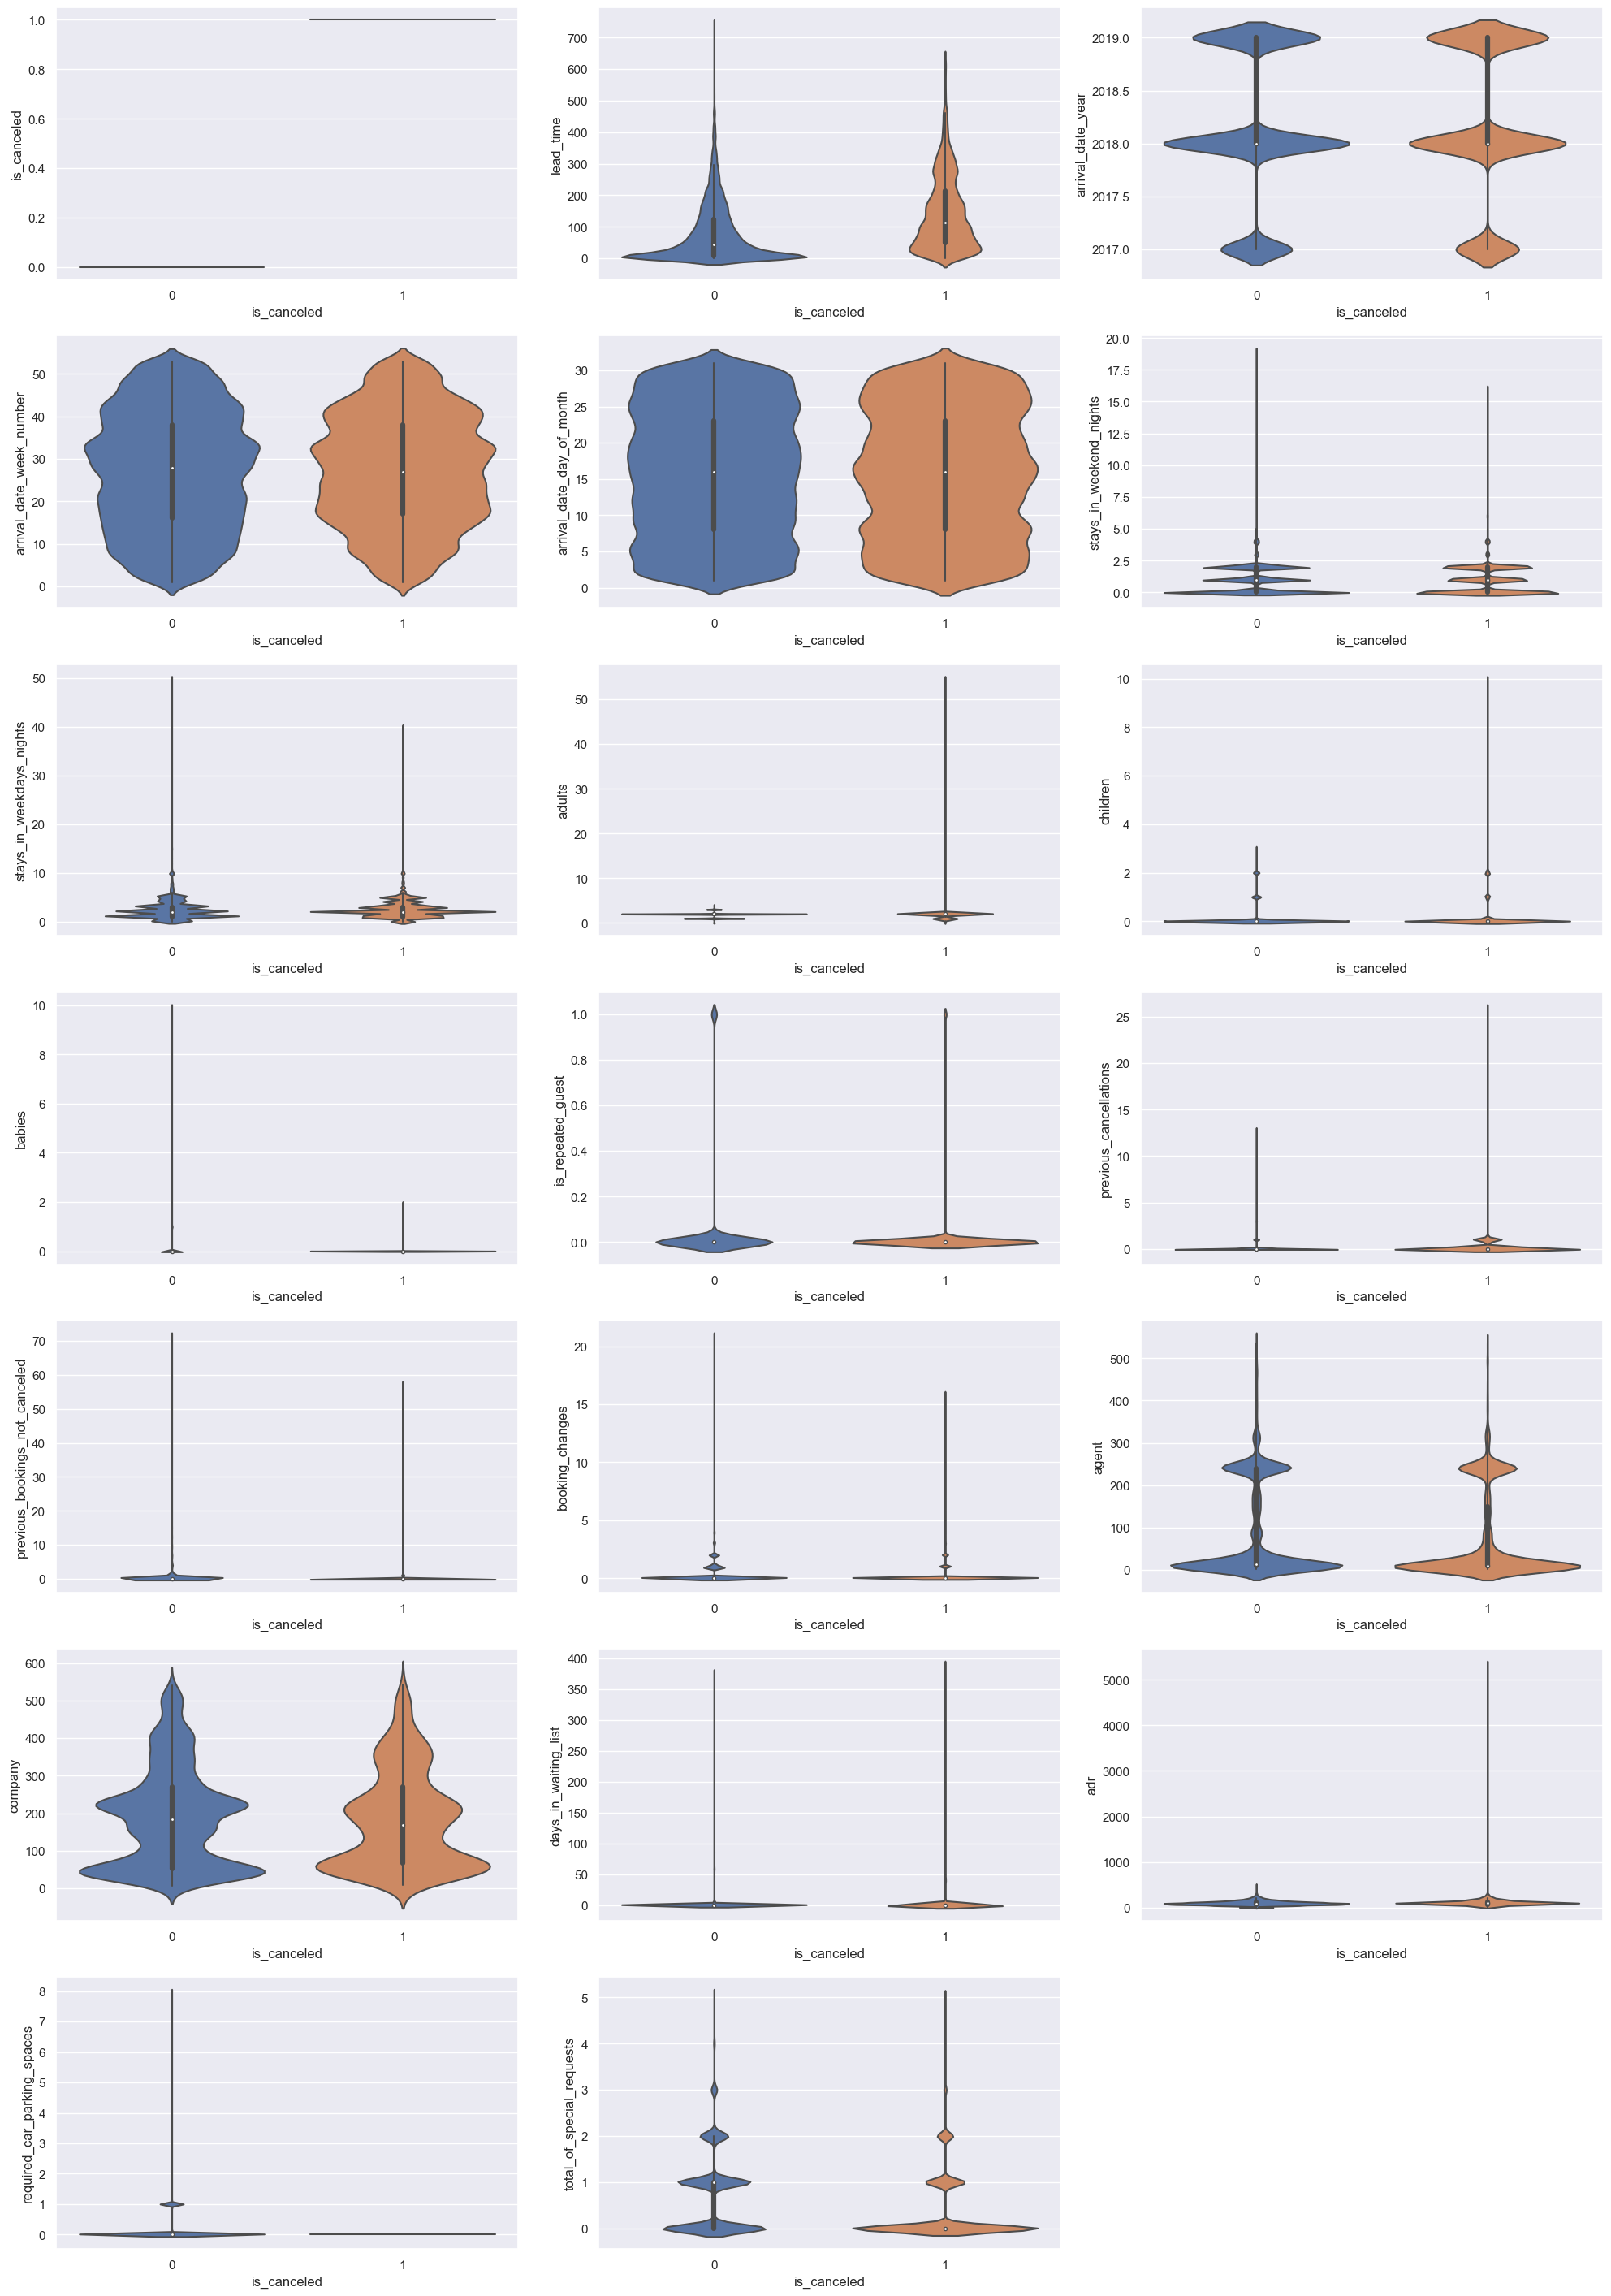

In [ ]:
# Select columns with int or float data types
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()

# Create subplots
num_rows = (len(num_vars) + 4) // 3  # Adjust the number of rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 4*num_rows))
axs = axs.flatten()

# Create violin plots for numeric columns against 'Response'
for i, var in enumerate(num_vars):
    sns.violinplot(y=var, data=df, x='is_canceled', ax=axs[i])

# Remove any extra empty subplots if needed
if len(num_vars) < len(axs):
    for i in range(len(num_vars), len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plots
plt.show()

# Data Preprocessing Part 2

In [ ]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

company     94.306893
agent       13.686238
children     0.003350
dtype: float64

In [ ]:
# Drop company column because the missing value percentage is 94%
df.drop(columns='company', inplace=True)
df.shape

(119390, 27)

In [ ]:
# Drop the rest missing value
df.dropna(inplace=True)
df.shape

(103048, 27)

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          475
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_weekdays_nights            30
adults                               6
children                             5
babies                               5
meal                                 5
market_segment                       7
distribution_channel                 4
is_repeated_guest                    2
previous_cancellations              13
previous_bookings_not_canceled      27
booking_changes                     19
deposit_type                         3
agent                              333
days_in_waiting_list               122
customer_type                        4
adr                               8632
required_car_parking_spaces          4
total_of_special_requests

# Label Encoding for Object datatype

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

hotel: ['Resort Hotel' 'City Hotel']
arrival_date_month: ['September' 'October' 'November' 'December' 'January' 'February' 'March'
 'April' 'May' 'June' 'July' 'August']
meal: ['Breakfast' 'Full Board' 'Dinner' 'No Meal' 'Undefined']
market_segment: ['Corporate' 'Online TA' 'Direct' 'Offline TA/TO' 'Groups' 'Complementary'
 'Aviation']
distribution_channel: ['Corporate' 'TA/TO' 'Direct' 'GDS']
deposit_type: ['No Deposit' 'Refundable' 'Non Refund']
customer_type: ['Personal' 'Contract' 'Family' 'Bussiness']
reservation_status: ['Check-Out' 'Canceled' 'No-Show']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

hotel: [1 0]
arrival_date_month: [11 10  9  2  4  3  7  0  8  6  5  1]
meal: [0 2 1 3 4]
market_segment: [2 6 3 5 4 1 0]
distribution_channel: [0 3 1 2]
deposit_type: [0 2 1]
customer_type: [3 1 2 0]
reservation_status: [1 0 2]


<AxesSubplot:>

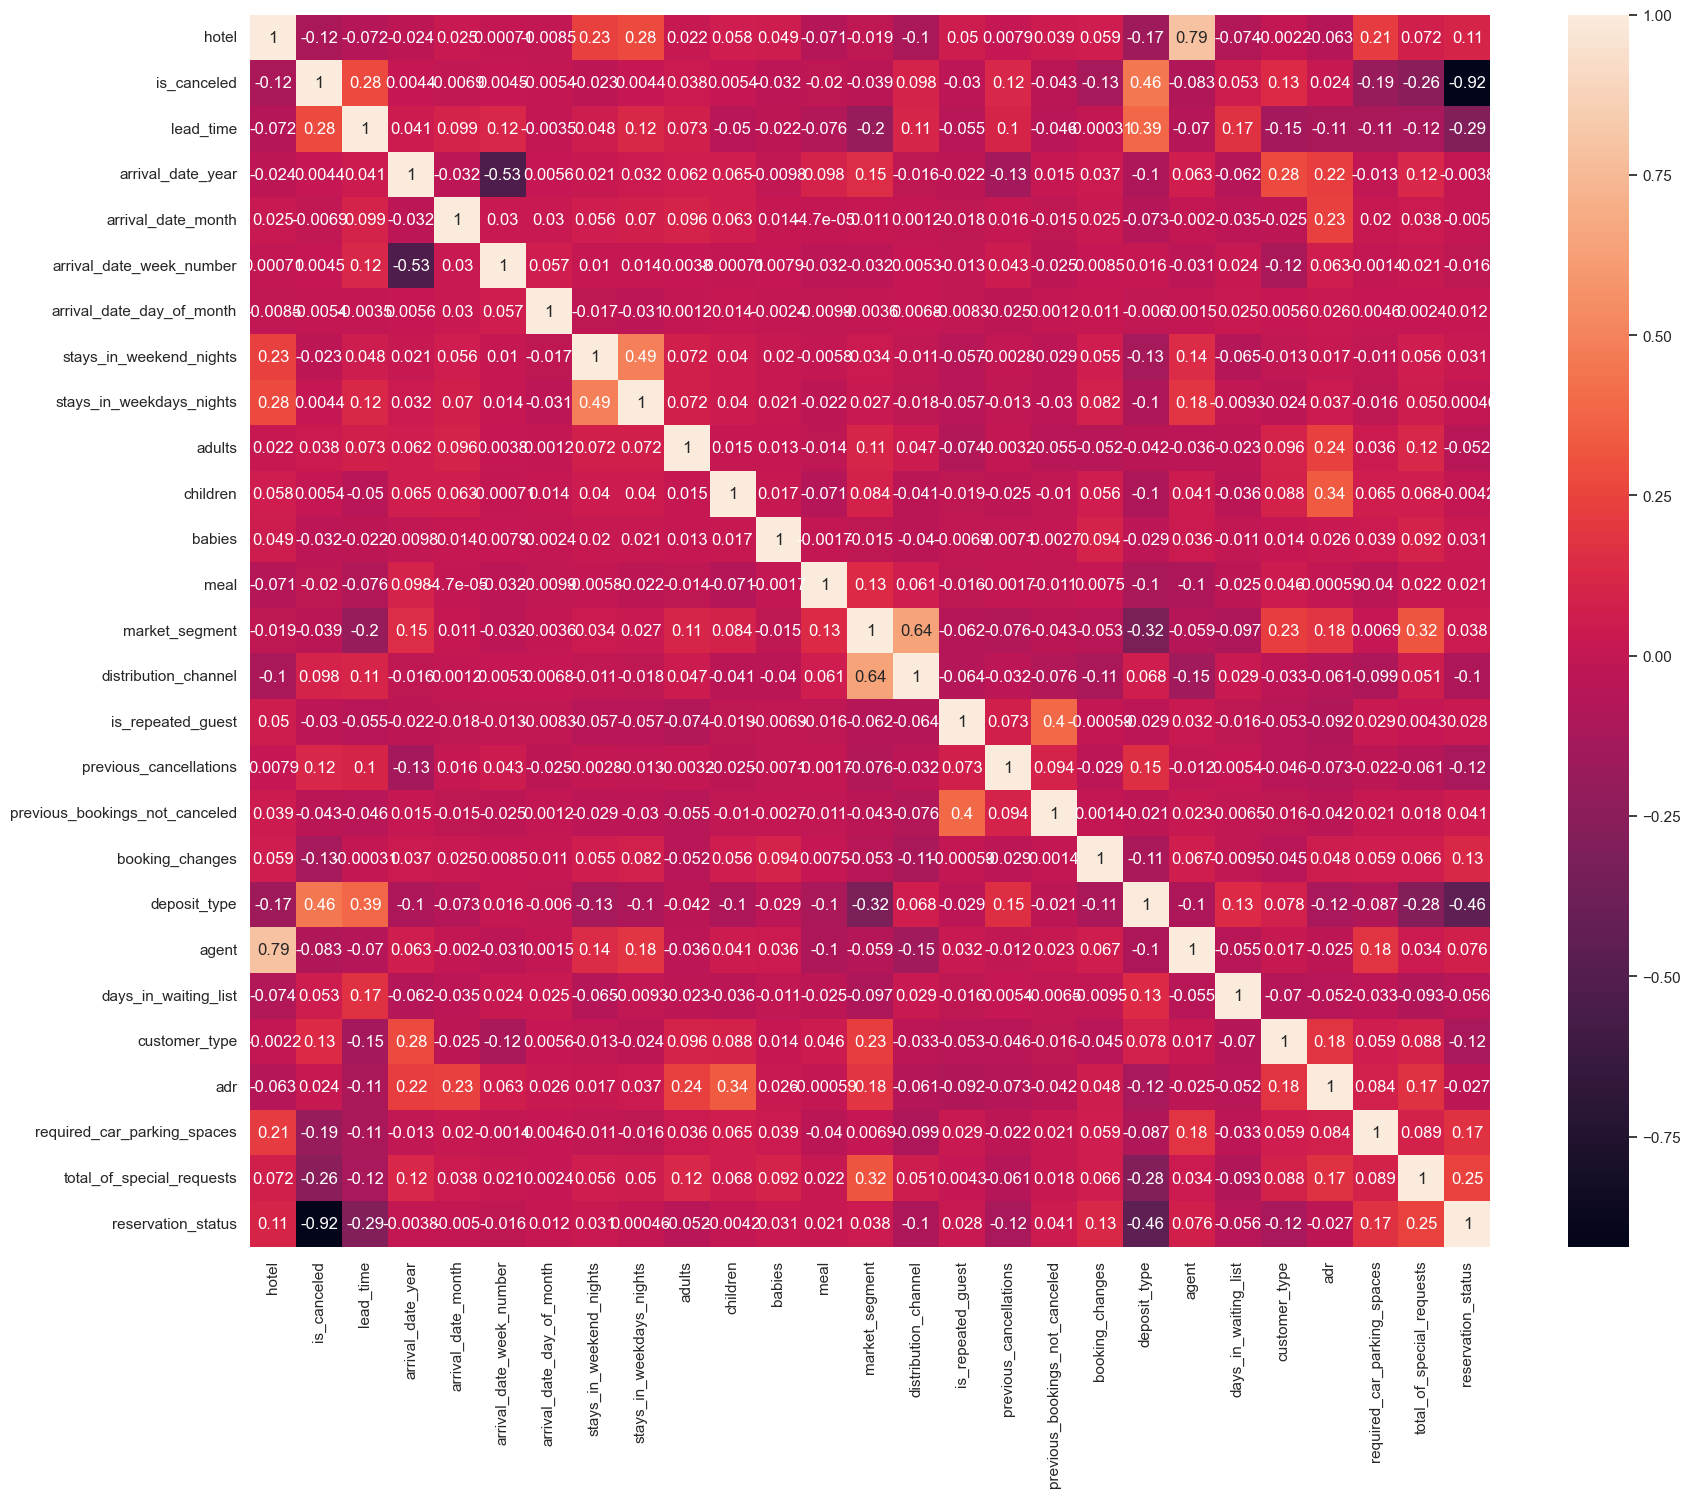

In [ ]:
#Correlation Heatmap (print the correlation score each variables)
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

In [ ]:
# Drop reservation_status column
df.drop(columns='reservation_status', inplace=True)
df.shape

(103048, 26)

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
# Select the features (X) and the target variable (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Remove the Outlier from train data using Z-Score

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_weekdays_nights',
            'adults', 'babies', 'previous_cancellations',
            'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list',
                    'required_car_parking_spaces', 'total_of_special_requests']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=4, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8,
                       min_samples_split=4, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 79.53 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.7953420669577875
Precision Score :  0.7953420669577875
Recall Score :  0.7953420669577875
Jaccard Score :  0.6602223296278396
Log Loss :  7.06869045385894


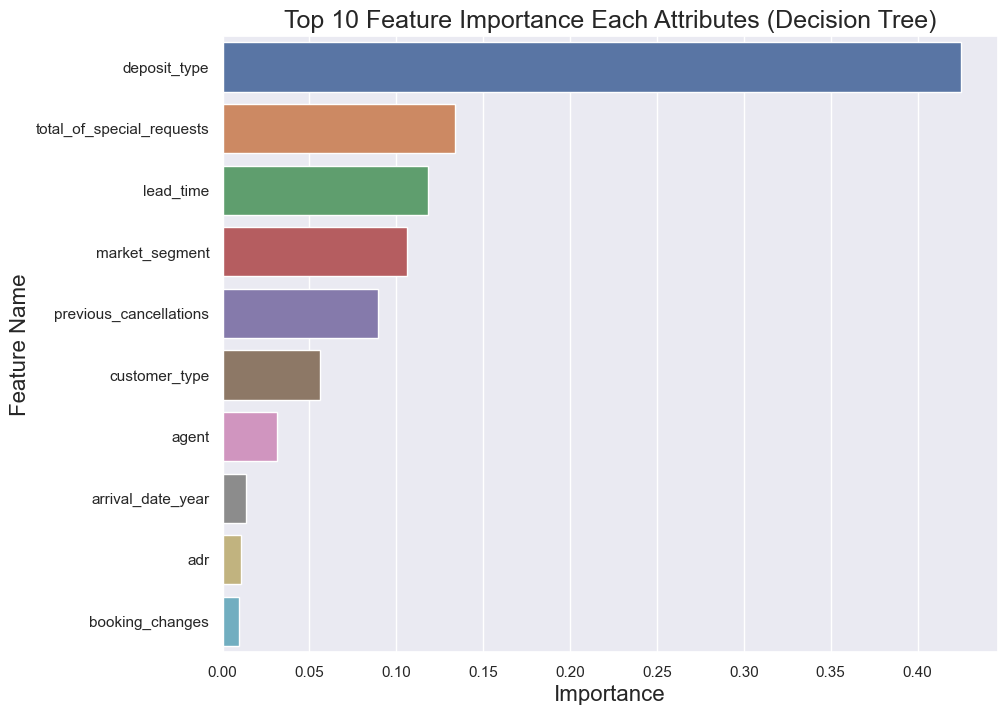

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

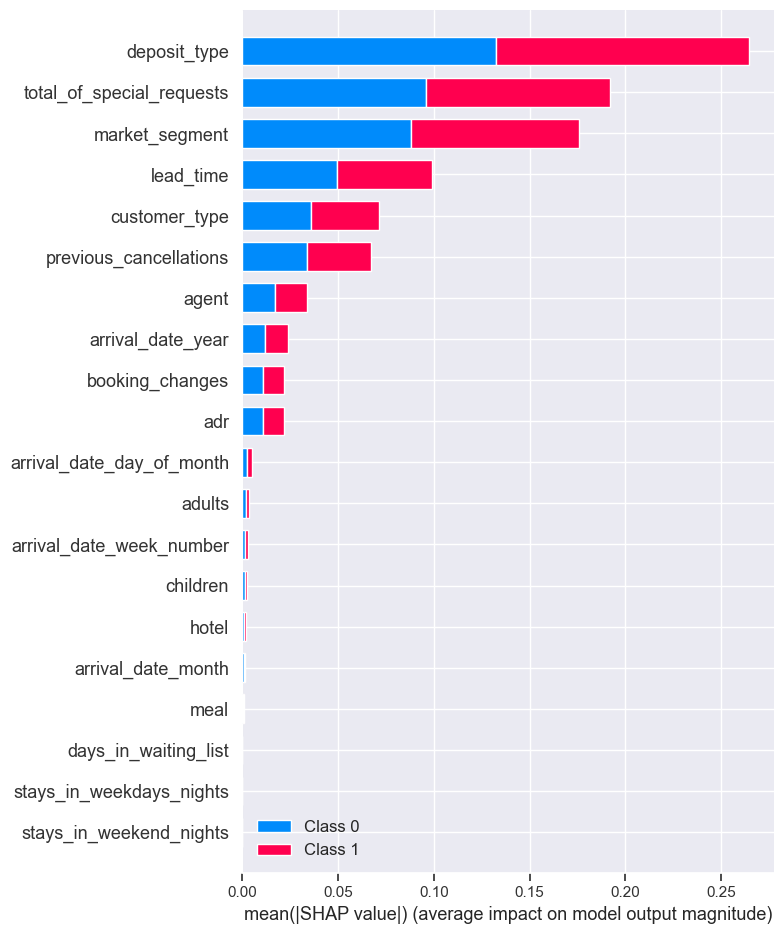

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

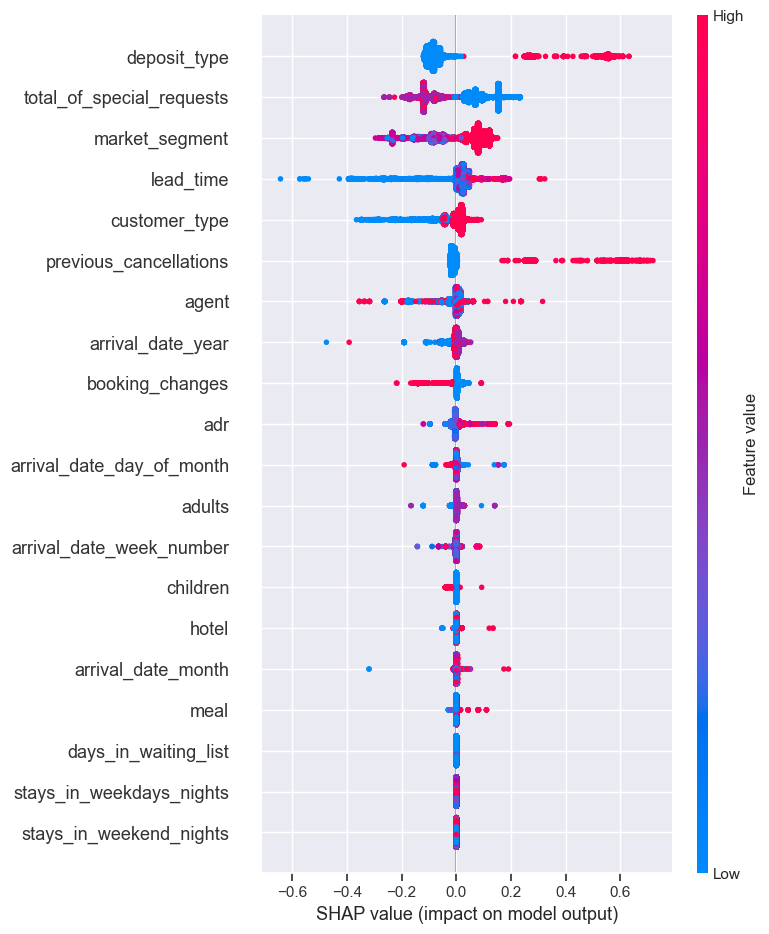

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.7953420669577875')

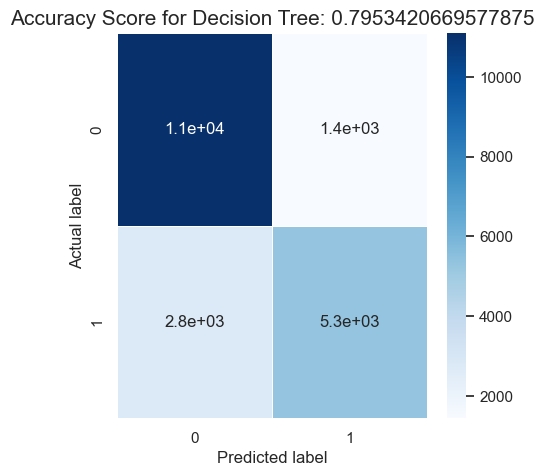

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

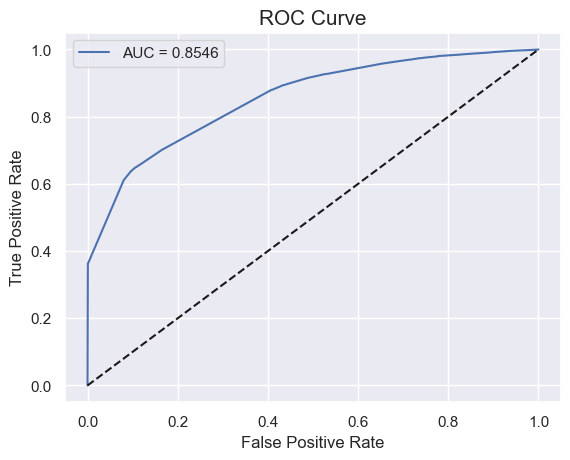

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_depth=10, max_features='sqrt', n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='sqrt', random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 81.11 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8111111111111111
Precision Score :  0.8111111111111111
Recall Score :  0.8111111111111111
Jaccard Score :  0.6822429906542056
Log Loss :  6.524041493568613


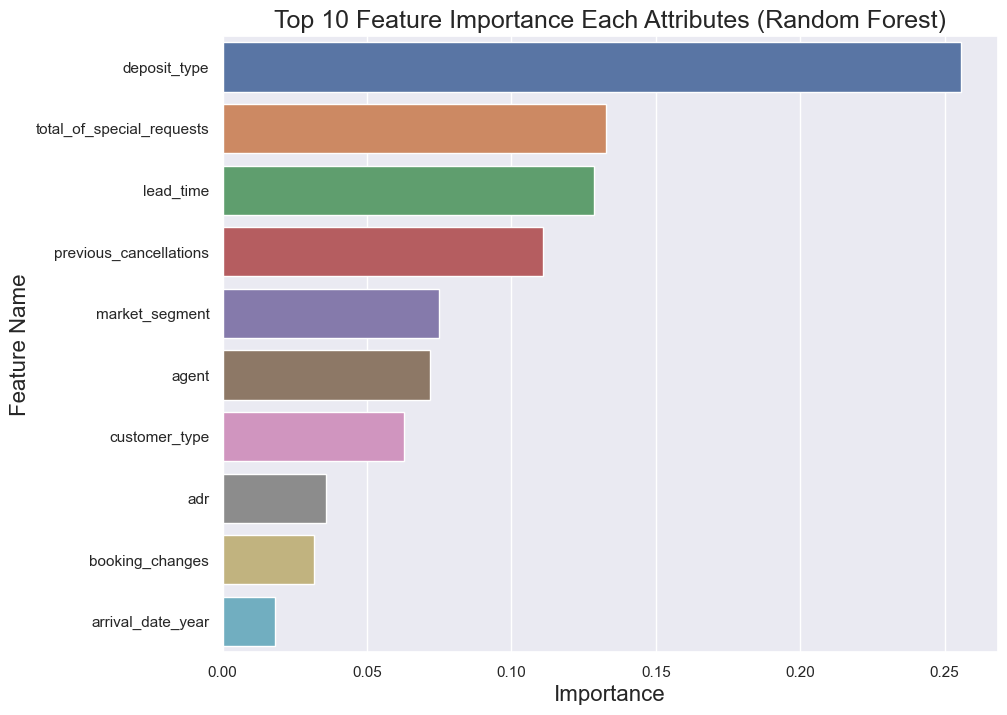

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

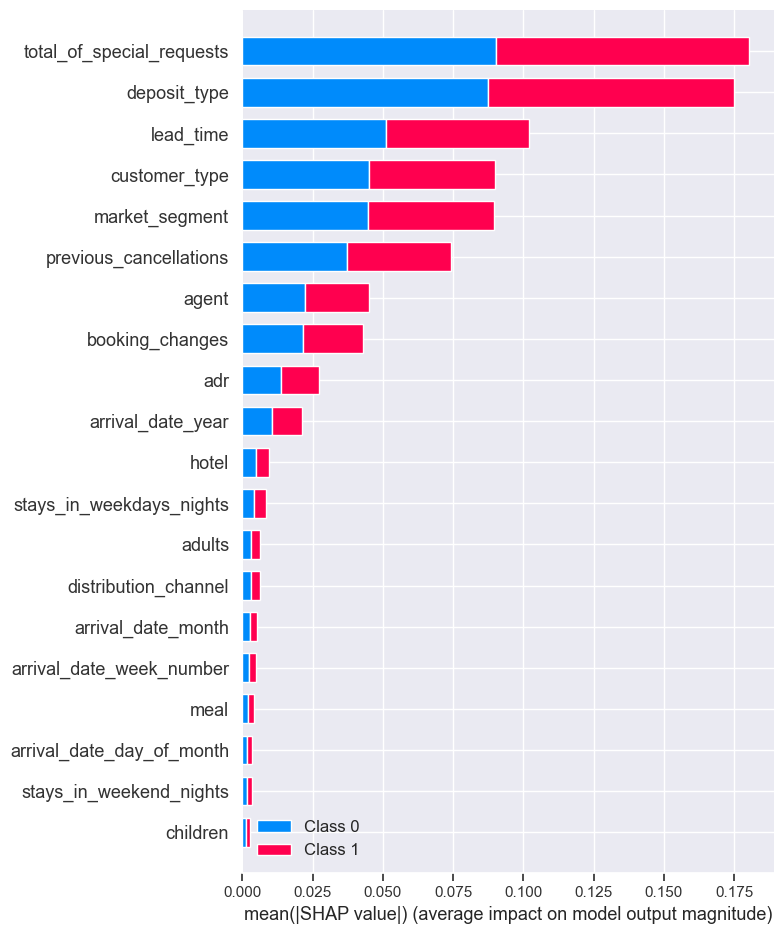

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

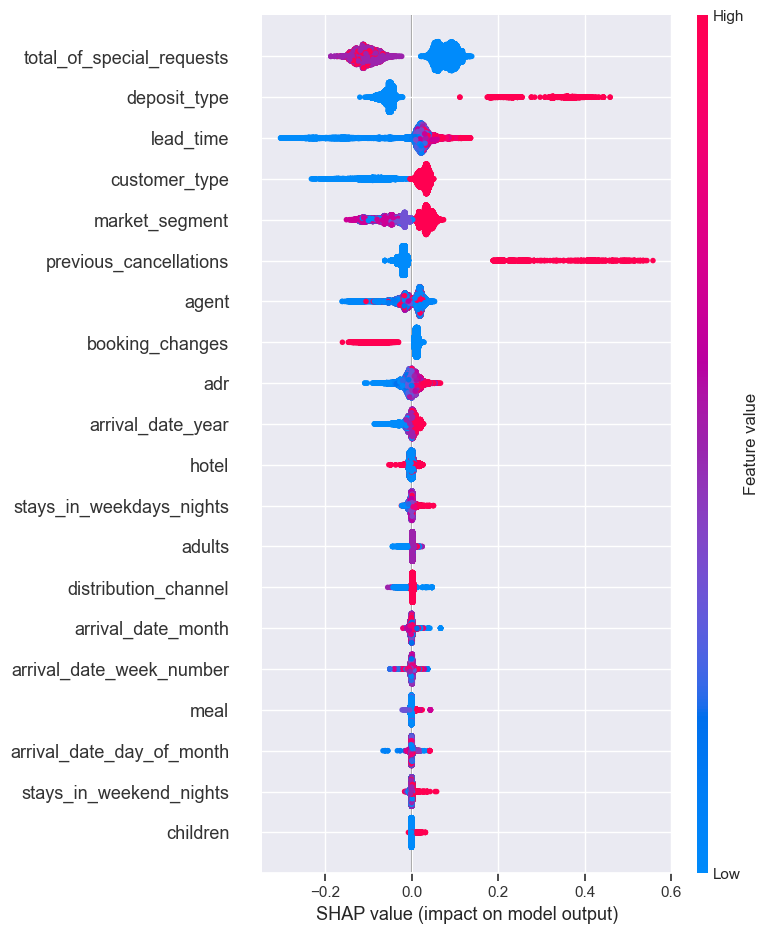

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8111111111111111')

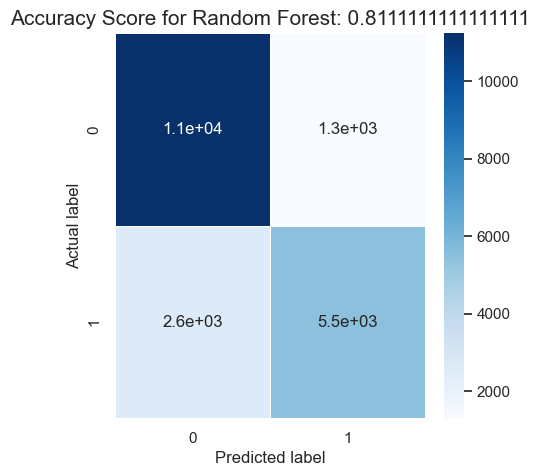

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

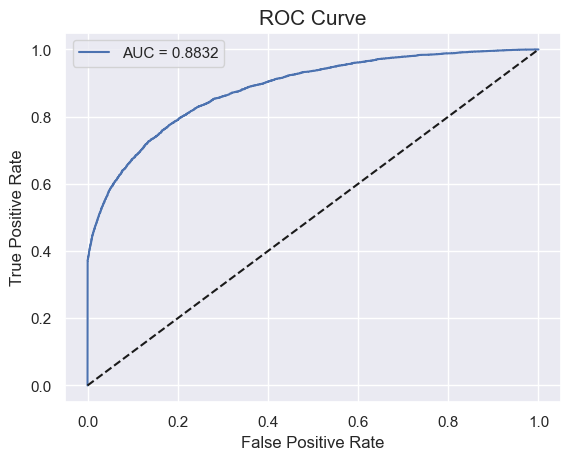

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()